# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

## **Importing Libraries**

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.decomposition import PCA

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [3]:
# Mounting Google Drive to access csv file/data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading data into a Pandas dataframe from csv file in Google Drive
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/marketing_campaign.csv", sep="\t")
df = data.copy() #copy original data to work on further. If you make a mistake you don't effect "data".

## **Data Overview**

#### **Question 1**: What are the data types of all the columns?

In [5]:
# dataframe.info() will give all data types for all variables in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##### **Observations:**

1. Over a 2 year span, there were 2240 total unique customers
2. Only 4 variables are non-integers (Date of last purchase, income, marital status and education)


#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [6]:
# dataframe.describe will display a statistical summary of the dataset
# .T will transpose the axes to make it easier to read
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


##### **Observations:**
1. The average household income is $52,247
2. The average age of the customers is 56 years old
3. On average, customers shop every 49 days
4. Atleast 75% of customers shop twice in a month (30 days)

#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [7]:
# dataframe.isnull() will check for missing values in the dataset.
df.isnull()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2237,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# if we sum all the values produced by isnull() function, we can verify that there truly are no missing values
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [9]:
# there 24 instances where income is 0 in the dataset so we must ignore/remove those rows
 #(if you aren't making money you aren't spending it at our business)
df = df.dropna()
df
#total rows drops from 2240 to 2216 which verifies the method

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


##### **Observations:**

1. Customers with 0 reported income have been left out of the dataset

#### **Question 4**: Are there any duplicates in the data?

In [10]:
# dataframe.duplicated() will return true/false for row duplicates. Showing the dataframe of the duplicates will be a better visual.
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


##### **Observations:**
1. There are no duplicate values in the dataset.

In [11]:
#Removing 11 unnecessary columns from dataset
columns_to_drop = ['Dt_Customer','ID','AcceptedCmp1', 'Z_CostContact', 'Z_Revenue', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Education', 'Marital_Status']
df.drop(columns=columns_to_drop, axis=1, inplace=True)


In [12]:
#total number of columns from 29 to 18 which verifies the method
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   MntWines             2216 non-null   int64  
 6   MntFruits            2216 non-null   int64  
 7   MntMeatProducts      2216 non-null   int64  
 8   MntFishProducts      2216 non-null   int64  
 9   MntSweetProducts     2216 non-null   int64  
 10  MntGoldProds         2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   int64 

In [13]:
# We can change the birth year to age to make that specific variable increase from left to right
# Now that we have the ages of the customers, we can drop the birth year column
# Total columns remains 18 as birth year is dropped and age is added
df['Age']=pd.Timestamp('now').year-df['Year_Birth'];
df.drop(columns='Year_Birth', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2216 non-null   float64
 1   Kidhome              2216 non-null   int64  
 2   Teenhome             2216 non-null   int64  
 3   Recency              2216 non-null   int64  
 4   MntWines             2216 non-null   int64  
 5   MntFruits            2216 non-null   int64  
 6   MntMeatProducts      2216 non-null   int64  
 7   MntFishProducts      2216 non-null   int64  
 8   MntSweetProducts     2216 non-null   int64  
 9   MntGoldProds         2216 non-null   int64  
 10  NumDealsPurchases    2216 non-null   int64  
 11  NumWebPurchases      2216 non-null   int64  
 12  NumCatalogPurchases  2216 non-null   int64  
 13  NumStorePurchases    2216 non-null   int64  
 14  NumWebVisitsMonth    2216 non-null   int64  
 15  Complain             2216 non-null   int64 

## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

In [14]:
# Generating a function to easily plot boxplots and histograms of every piece of data (param) vs the count.
def histboxfunc(df, param):

  figure, ax = plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':(3,7)}, figsize=(15,7))
  sns.boxplot(data=df, x = param, showmeans=True, ax=ax[0], color='yellow')
  sns.histplot(data=df, x = param, kde = True, line_kws= {'linestyle': 'dashed'}, fill=False, ax=ax[1], color='green')
  ax[1].axvline(df[param].mean(),color='Red')
  ax[1].axvline(df[param].median(),linestyle='--', color='blue')

**INCOME**

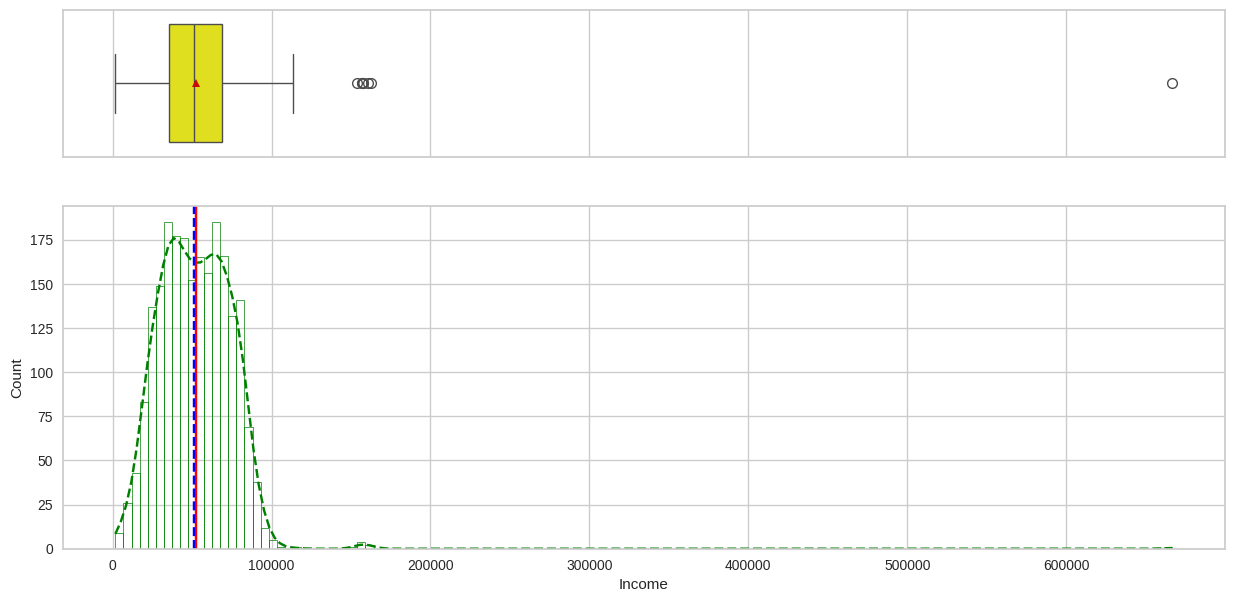

In [15]:
histboxfunc(df,'Income')

##### **Observations:**
  1. The distribution is right skewed and very few customers make over 100,000 dollars a year in income.

**AGE**

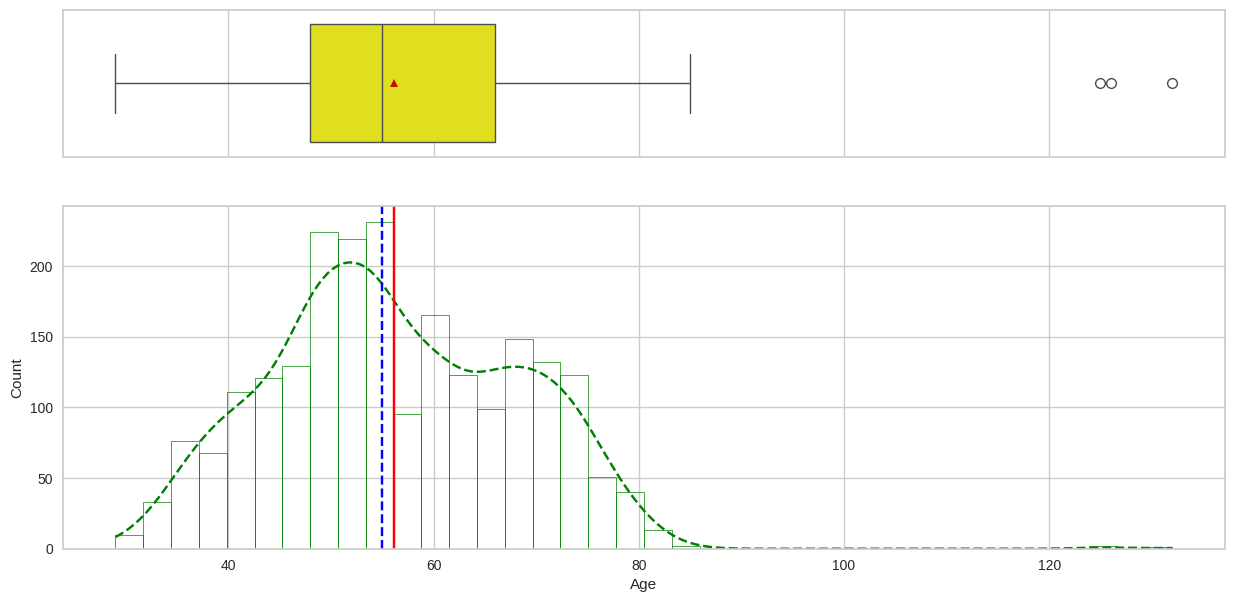

In [16]:
histboxfunc(df, "Age")

##### **Observations:**
  1. There are outliers in the age data but generally normally distributed.
  2. Youngest customer in dataset is 29 years old.

**RECENCY**

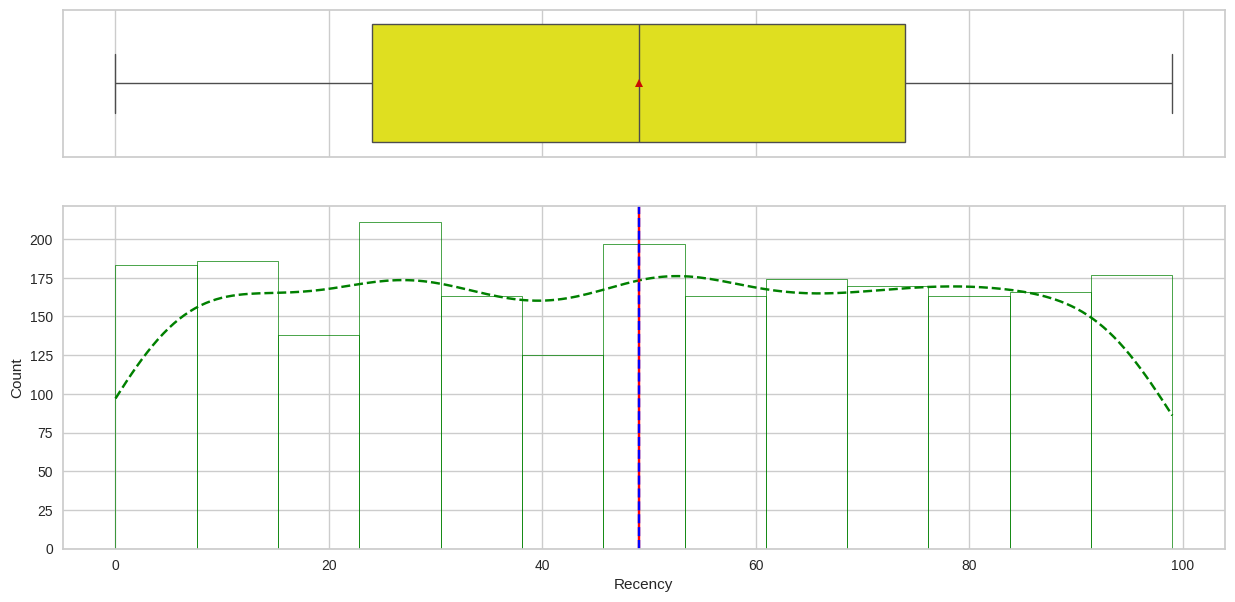

In [17]:
histboxfunc(df, 'Recency')

##### **Observations:**
  1. Recency distribution is flat.

**AMOUNT SPENT ON WINE (LAST 2 YRS)**

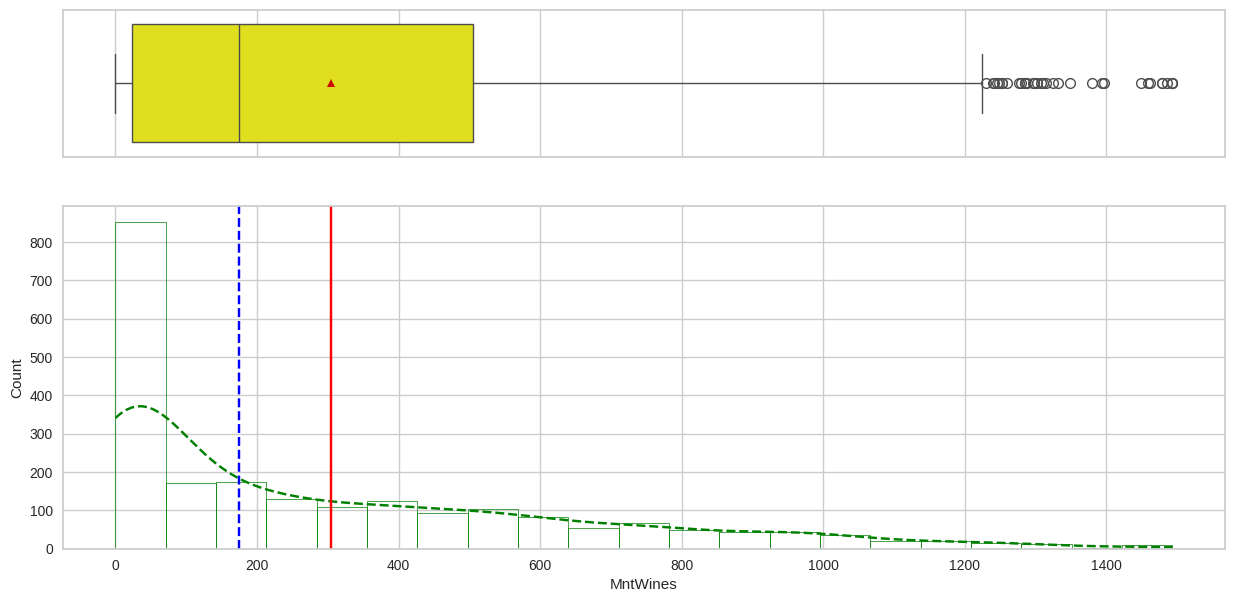

In [18]:
histboxfunc(df, 'MntWines')

##### **Observations:**
  1. Data is right skewed with most customers spending less than 200 dollars on wine in the last 2 years.

**AMOUNT SPENT ON FRUIT (LAST 2 YRS)**

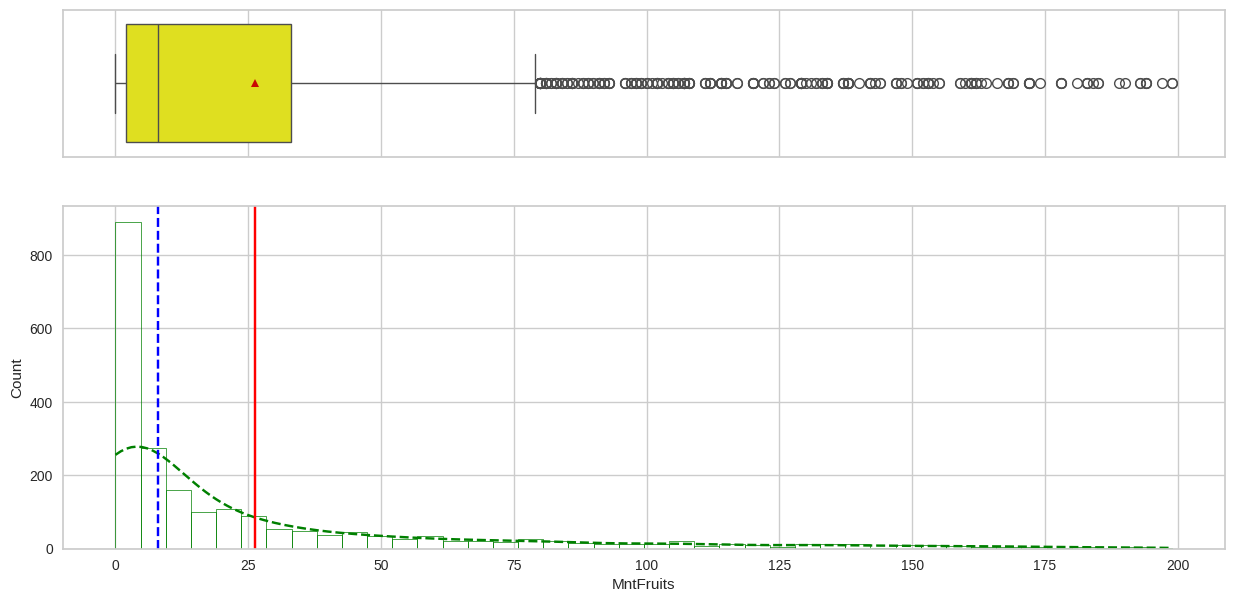

In [19]:
histboxfunc(df, 'MntFruits')

##### **Observations:**
  1. Data is positively skewed with some high outliers.

**AMOUNT SPENT ON MEAT (LAST 2 YEARS)**

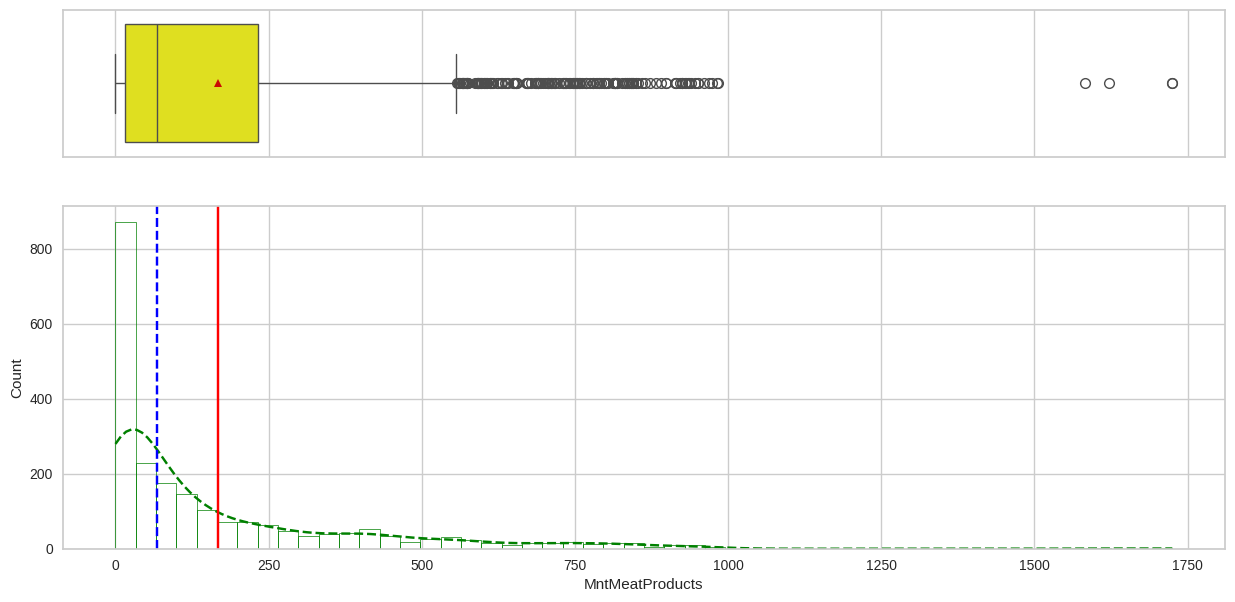

In [20]:
histboxfunc(df,'MntMeatProducts')

##### **Observations:**
  1. The distribution is right skewed and most customer spend less than 200 dollars on meat in the last 2 years.

**AMOUNT SPENT ON FISH (LAST 2 YEARS)**

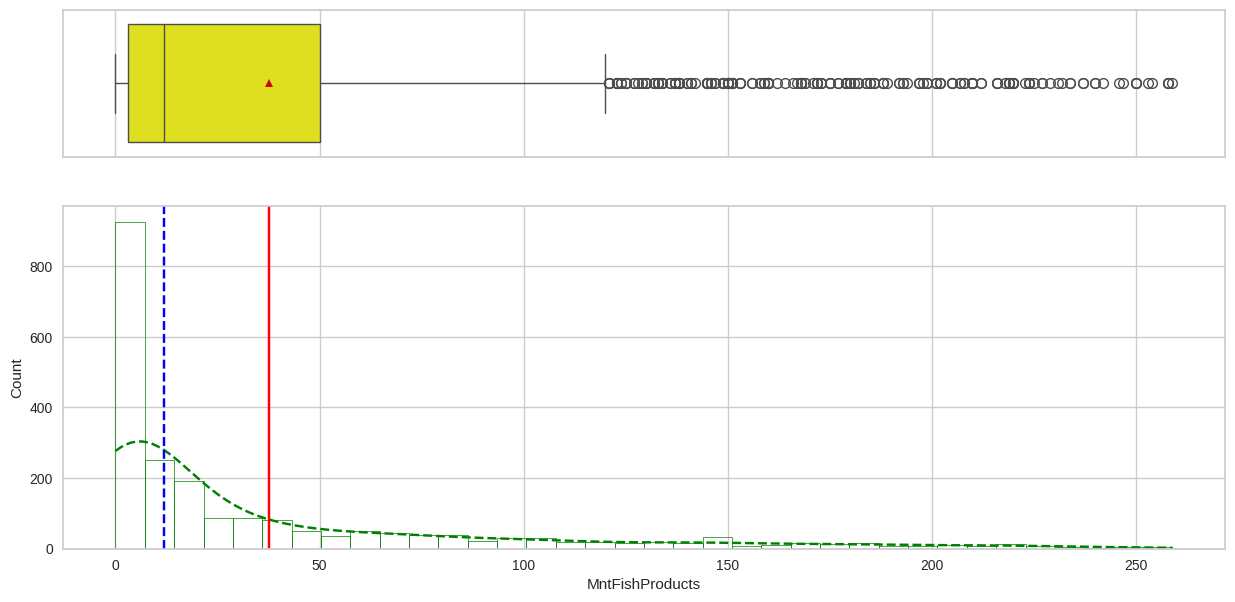

In [21]:
histboxfunc(df, 'MntFishProducts')

##### **Observations:**
  1. The distribution is right skewed and very similar to amounts spent on meat and gold.

**AMOUNT SPENT ON SWEETS (LAST 2 YRS)**

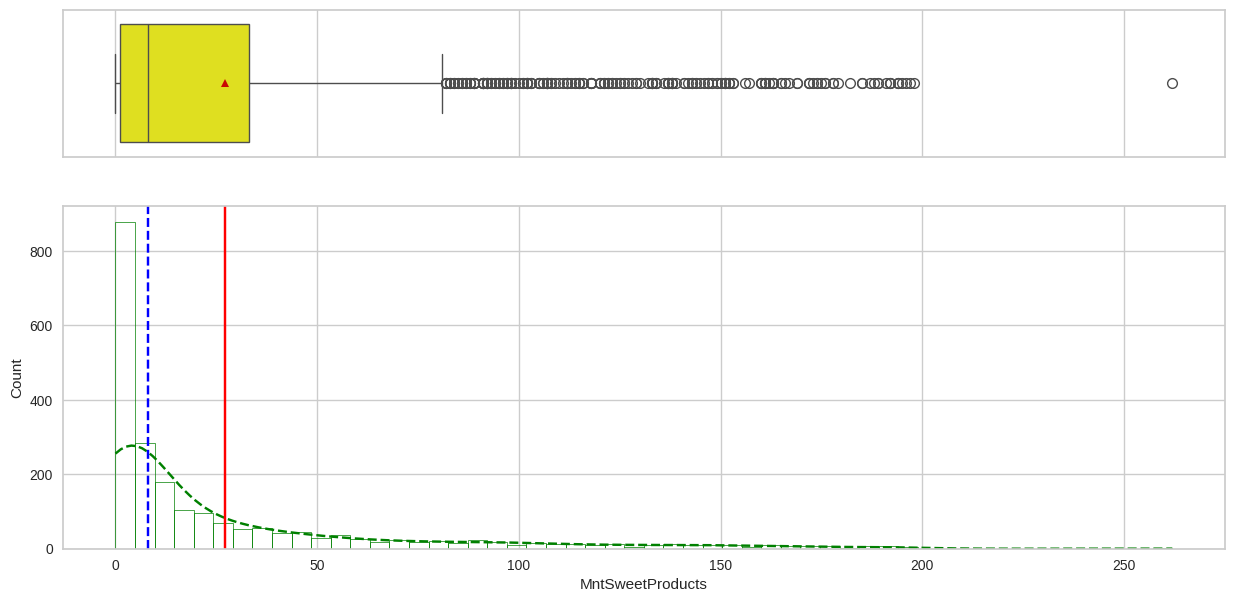

In [22]:
histboxfunc(df, 'MntSweetProducts')

##### **Observations:**
  1. The distribution is right (positively) skewed with the mean amount of sweets purchased is larger than the median. This is due to a few outliers that spend a significant amount on sweets.


**AMOUNT SPENT ON GOLD PRODUCTS (LAST 2 YRS)**

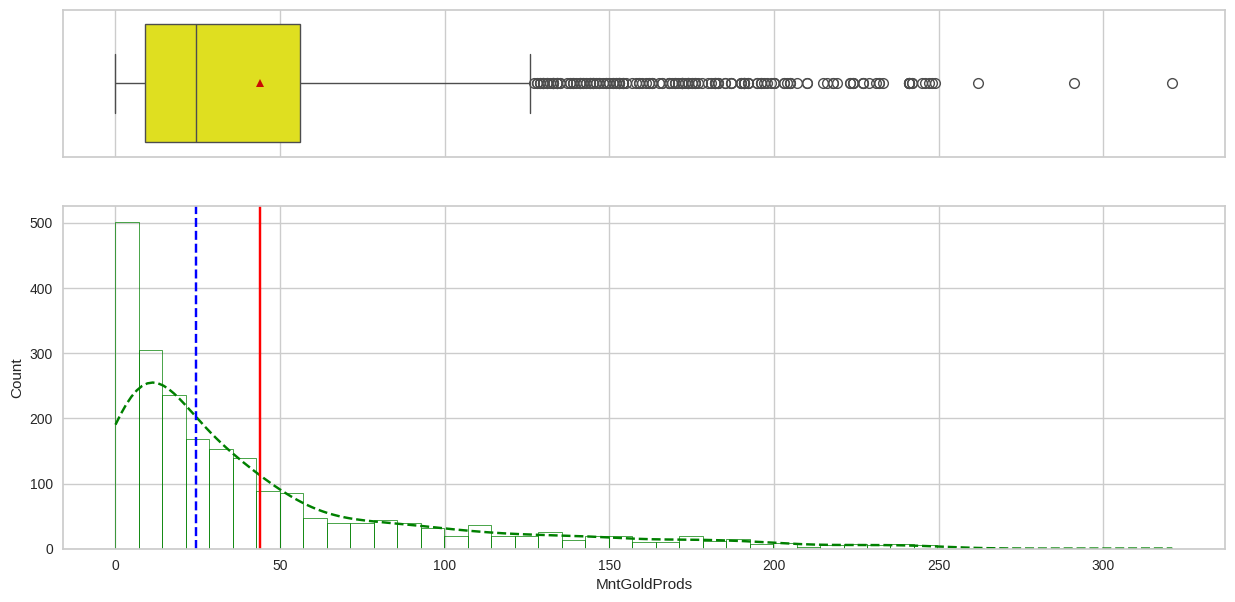

In [23]:
histboxfunc(df, 'MntGoldProds')

##### **Observations:**
  1. The distribution for the amount spent on gold products is right skewed with mean amount spent over a 2 year period per customer is but the median is much less proving there are outliers skewing the data to the right..

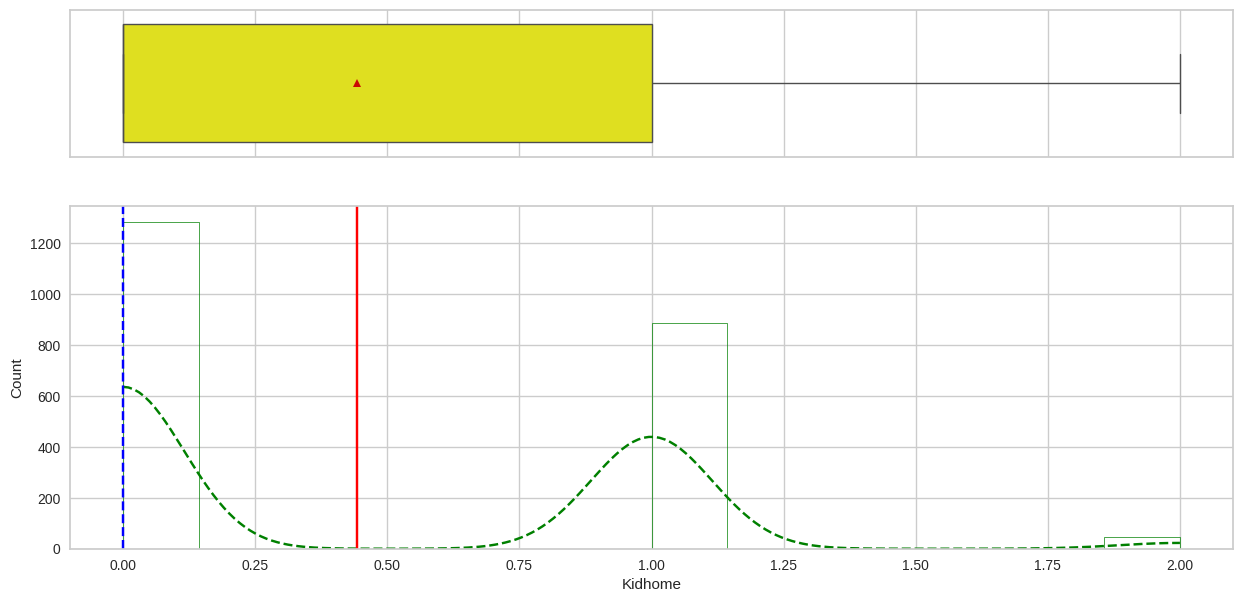

In [24]:
histboxfunc(df, 'Kidhome')

##### **Observations:**
  1. Median kidhome is 0 which means most customers in the dataset don't have children.

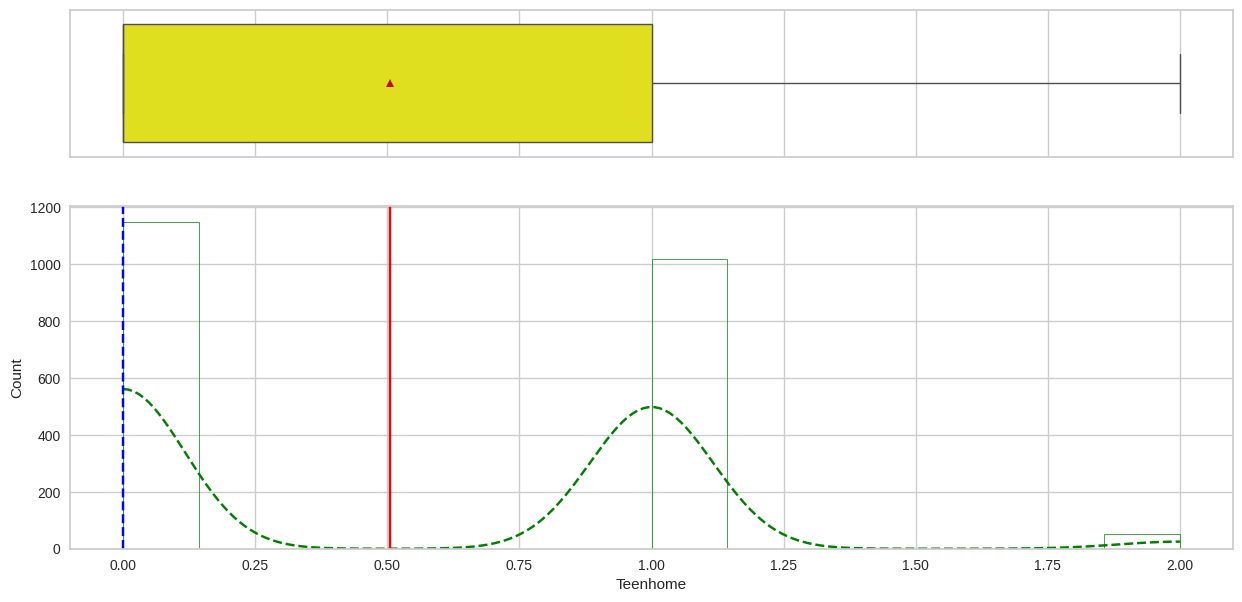

In [169]:
histboxfunc(df, 'Teenhome')

##### **Observations:**
  1. Median Teenhome is 0 which means that most customers in the dataset do not have children.
  2. Mean is .5 which suggests that most kid homes are teenhomes.

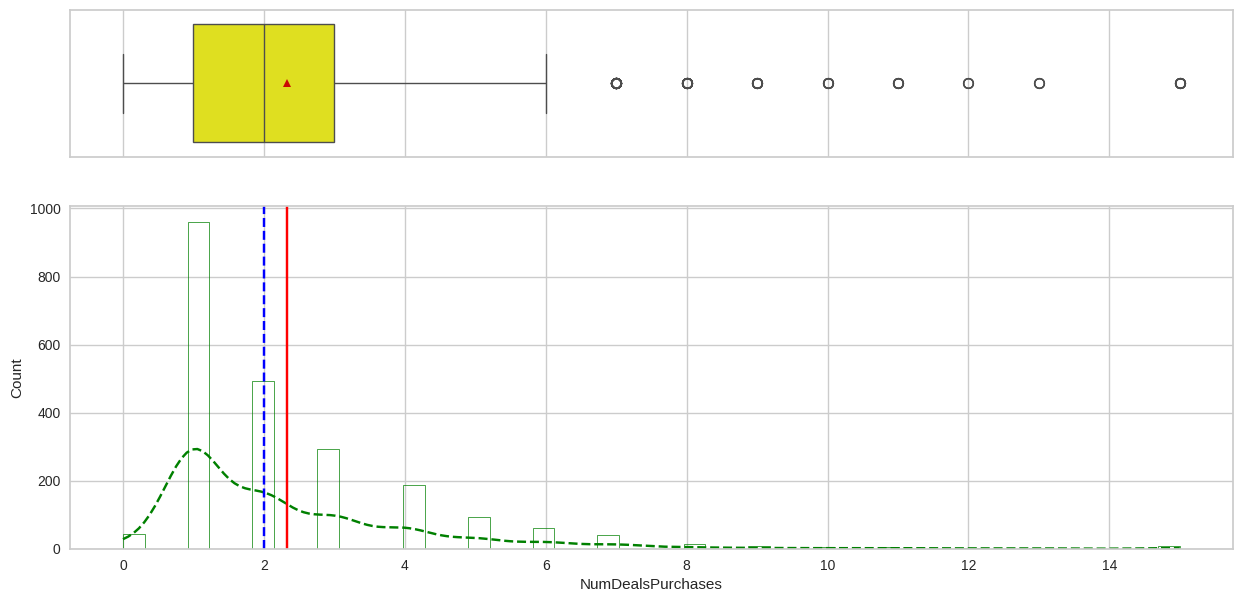

In [26]:
histboxfunc(df, 'NumDealsPurchases')

##### **Observations:**
  1. Distribution is skewed right with two outlier.

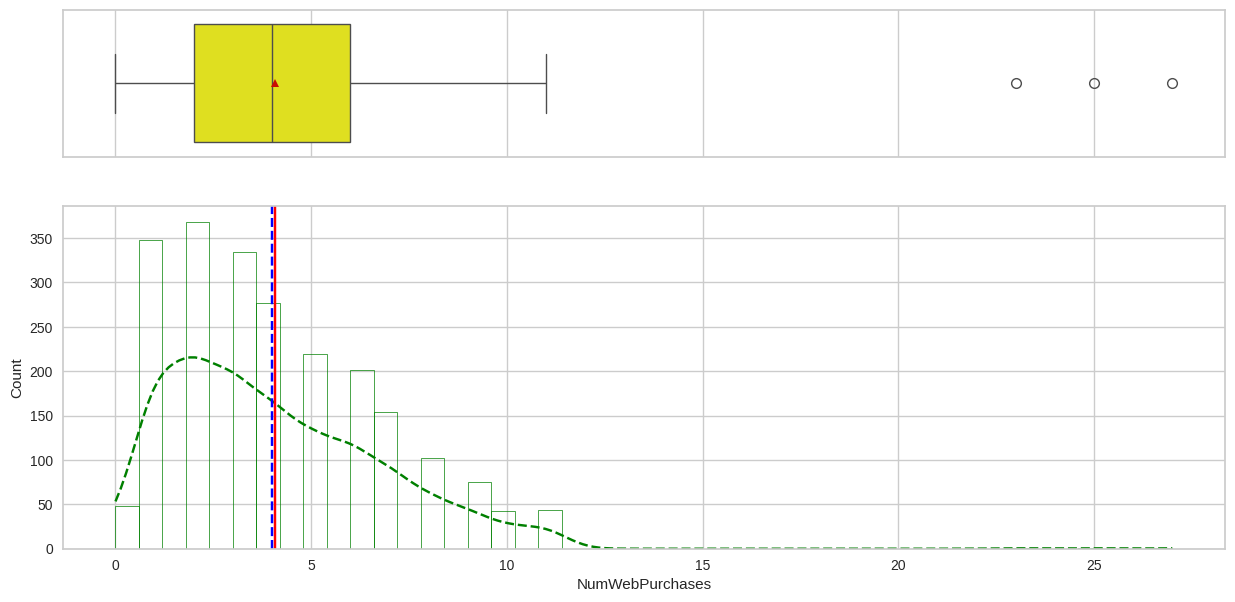

In [27]:
histboxfunc(df, 'NumWebPurchases')

##### **Observations:**
  1. Web Purchases distribution is skewed left slightly with most customers making less than 5 purchases.

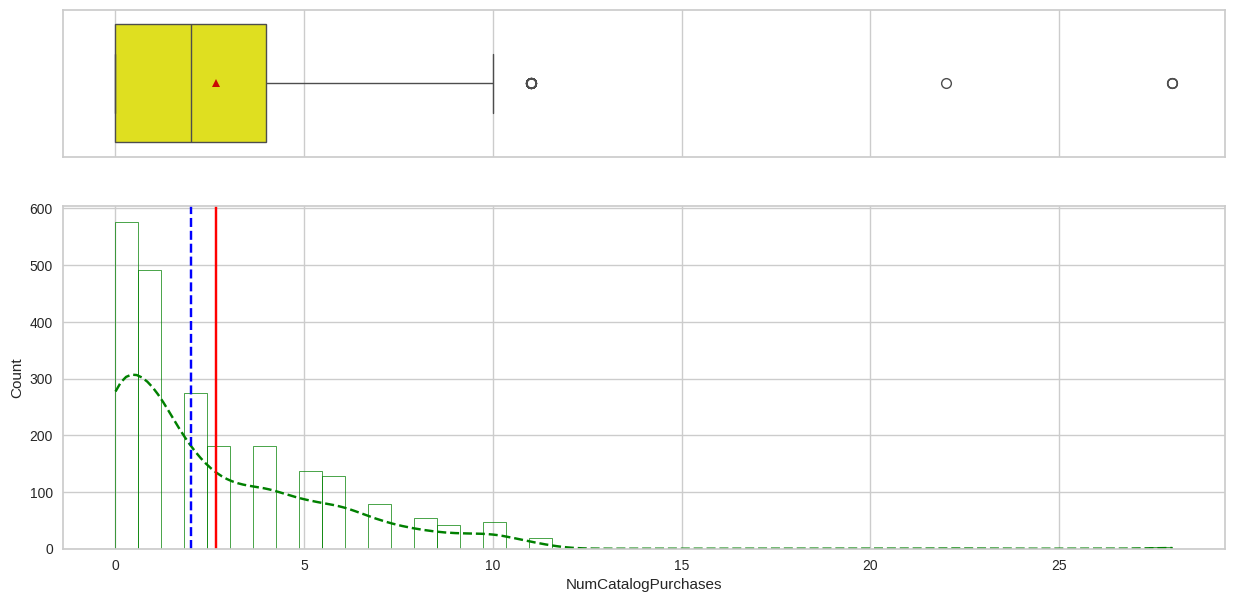

In [28]:
histboxfunc(df, 'NumCatalogPurchases')

##### **Observations:**
  1. Mean > median showing right skewed distribution.

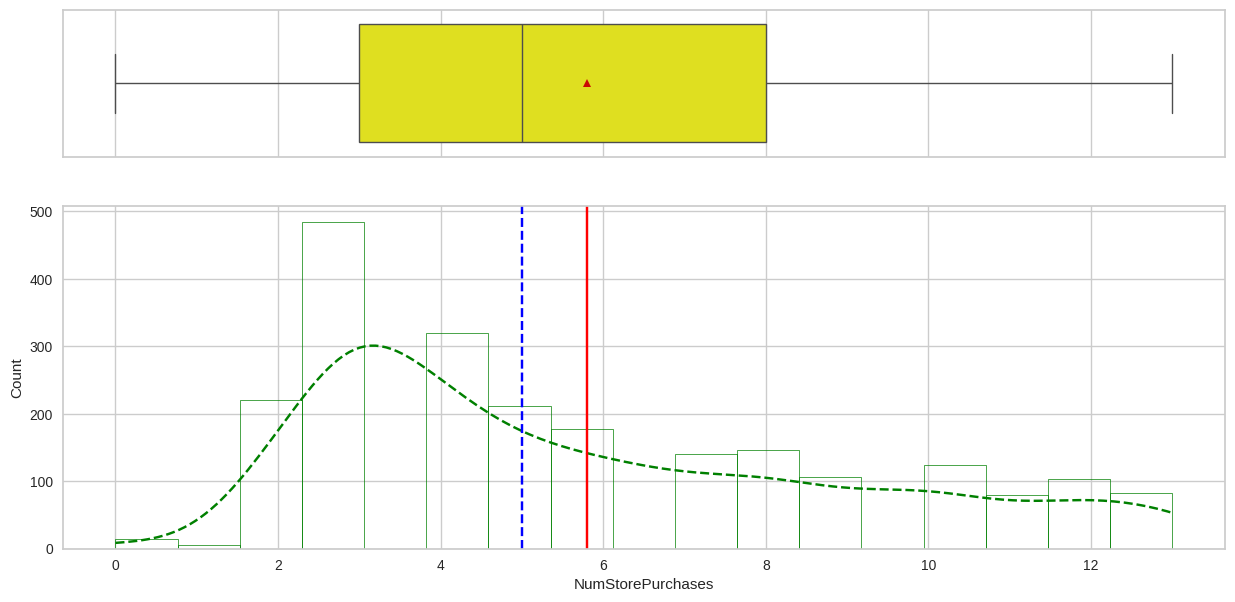

In [29]:
histboxfunc(df,'NumStorePurchases')

##### **Observations:**
  1. Data is right skewed with median store purchases to be 5. The mean store purchases are higher than 5 suggesting there are some high outliers.  

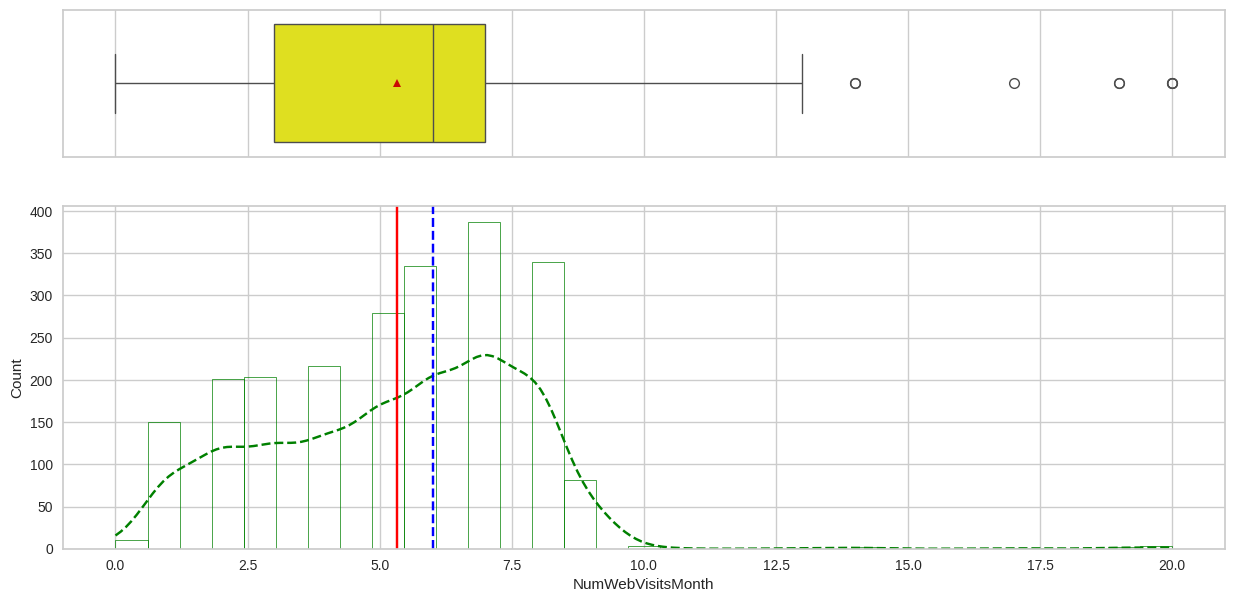

In [30]:
histboxfunc(df, 'NumWebVisitsMonth')

##### **Observations:**
  1. Mean is less than median meaning data is left skewed and web traffic overall is not high enough.

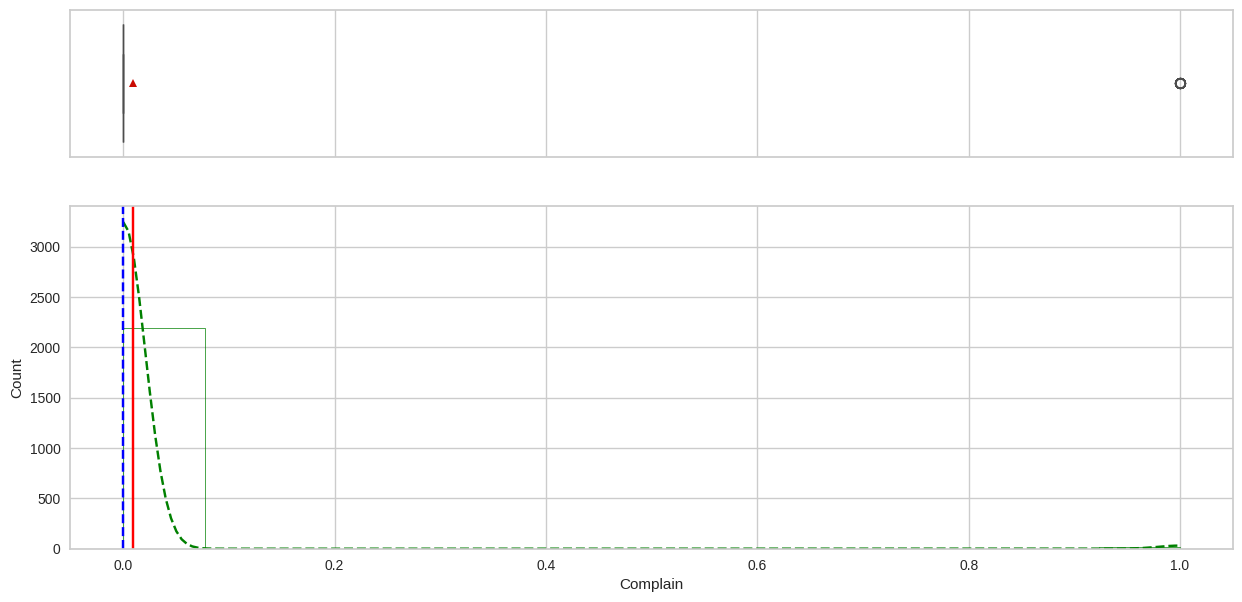

In [31]:
histboxfunc(df, 'Complain')

##### **Observations:**
  1. No observations as complaints are minimal

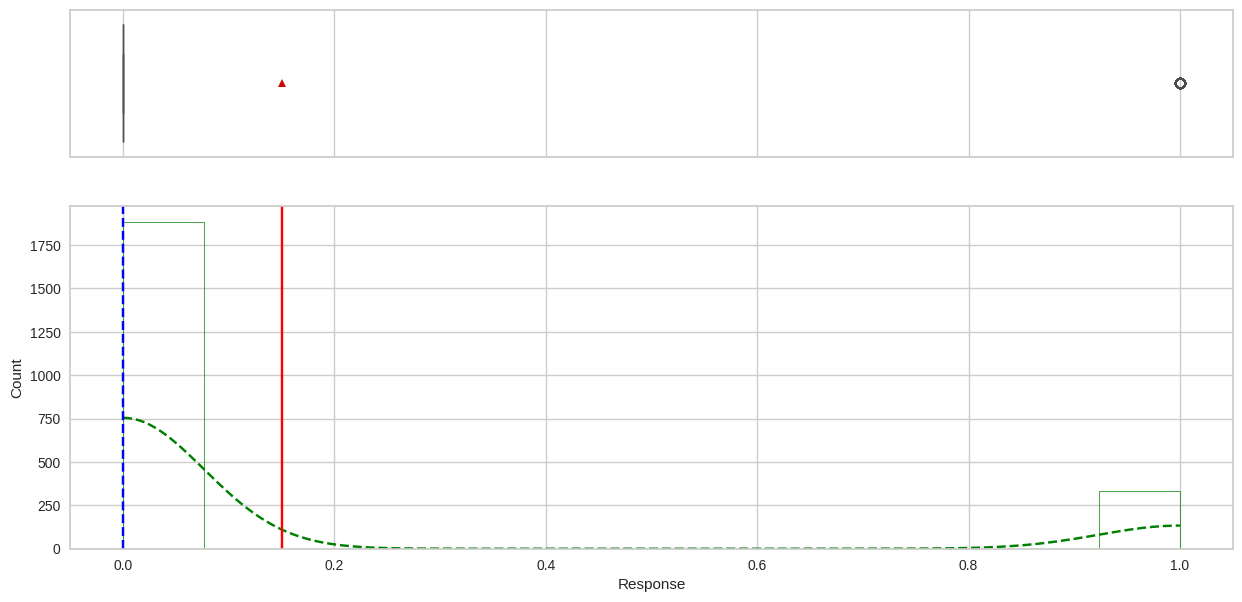

In [32]:
histboxfunc(df, 'Response')

##### **Observations:**
  1. No observations as responses are minimal

### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

<Axes: >

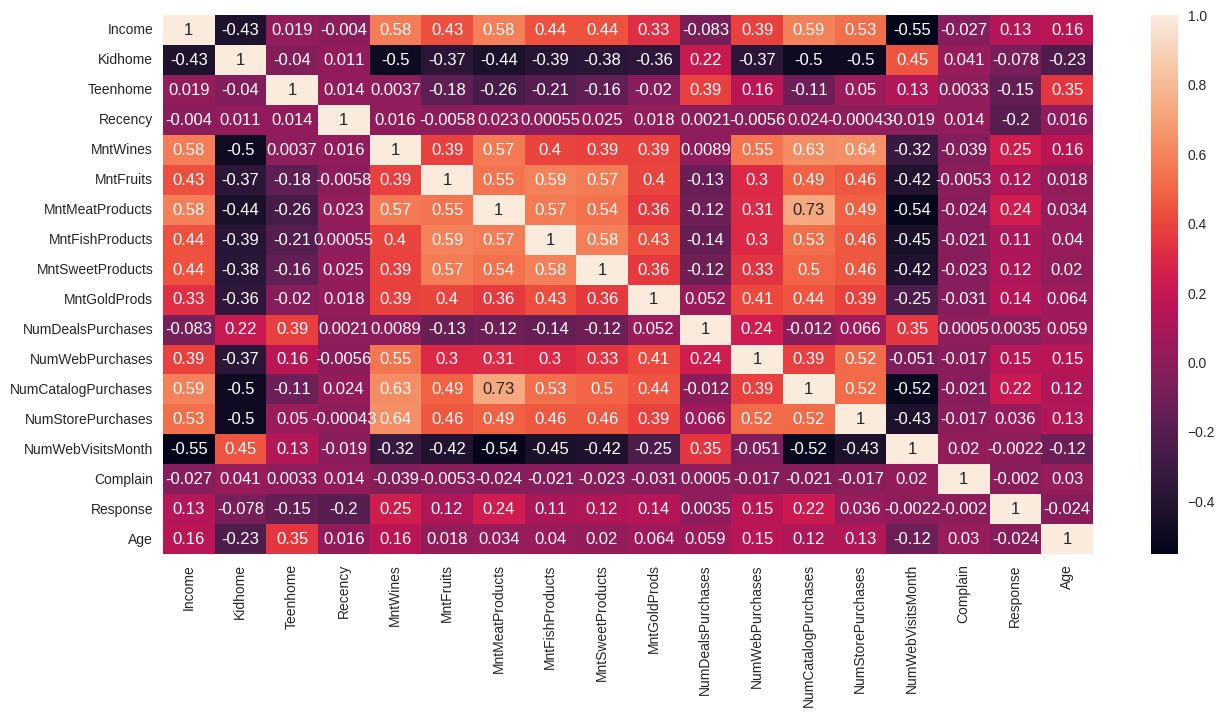

In [34]:
# Correlation matrix of the modified dataframe will provide the correlation (out of 100, or 1.0) between each variable in the dataset.
# Correlation matrix can be displayed as a heat map displaying in a grid format.
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot = True)

##### **Observations:**
1. There is a high correlation between catalog purchases and meat purchases which is kind of surprising but suggests a specific purchasing behaviour.

2. The highest correlation to age is teen home which really tells us that spending habits/trends are not generally correlated with this dataset. Since most of the customers are born after 1980, this makes sense.

3. Number of deals purchased is highly correlated with teenhome and number of web visits which suggests that customers with children/teens are the only ones seeing/using the deals available. More visibility on deals, ease of access on deals to customers without children/teens could be beneficial.

4. Recency does not have a strong correlation with any varaible suggesting that customers in generally are not returning to the store as frequent as they should be (i.e. settling for more convenient options, competition from other name brand stores, etc.)

<Figure size 1600x700 with 0 Axes>

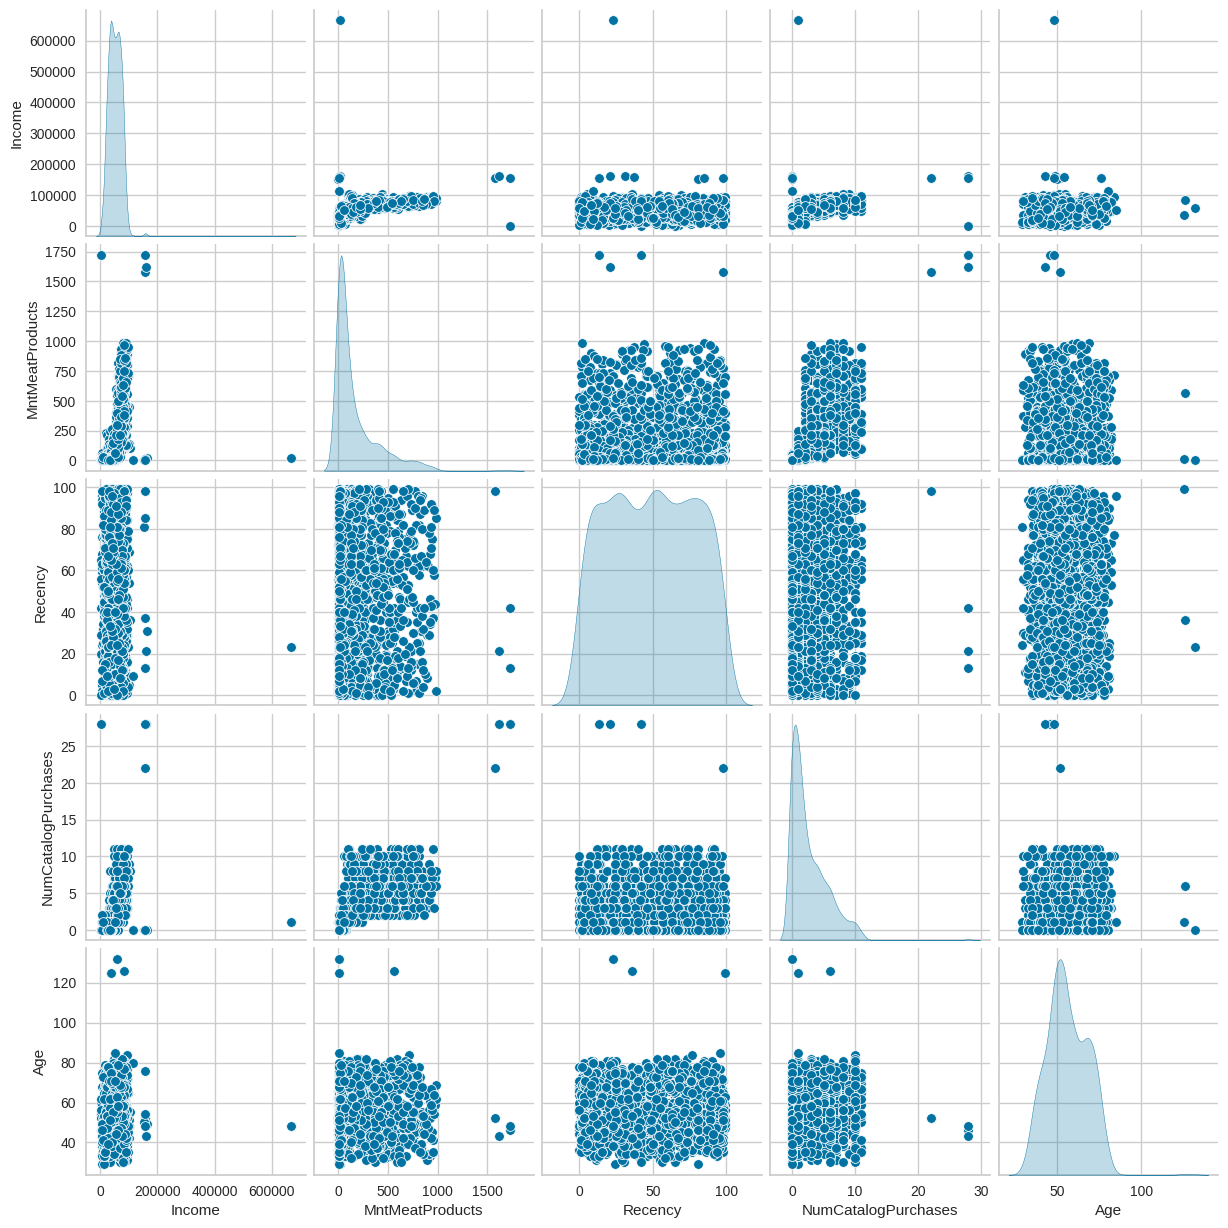

In [35]:
#Lets plot some variables together to visual some correlations.

plt.figure(figsize=(16,7))
sns.pairplot(data=df, x_vars=["Income", "MntMeatProducts", "Recency", "NumCatalogPurchases", "Age"],
                      y_vars=["Income", "MntMeatProducts", "Recency", "NumCatalogPurchases", "Age"], diag_kind="kde", height=2.5);

#Lets look at Income, MeatPurchases, Recency, CatalogPurchases and Age all together



 **Observations:**
1. As income goes up, customers shop more frequently and more likely to make  purchases in all categories.
2. It is clear a few customers are creating the correlation between meat purchases and catalog purchases.

## **K-means Clustering**

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

In [37]:
# You must scale the data in order to perform cluser analysis. Normalizes the dataset.
ss=StandardScaler()
dfscaled=pd.DataFrame(ss.fit_transform(df), columns=df.columns)
dfscaled.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age
0,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,-0.097812,2.377952,0.986443
1,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.097812,-0.420530,1.236801
2,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,-0.097812,-0.420530,0.318822
3,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-0.097812,-0.420530,-1.266777
4,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-0.097812,-0.420530,-1.016420


In [38]:
#copy data to be safe
scdata=dfscaled.copy()

Text(0.5, 1.0, 'K-Means Elbow Method')

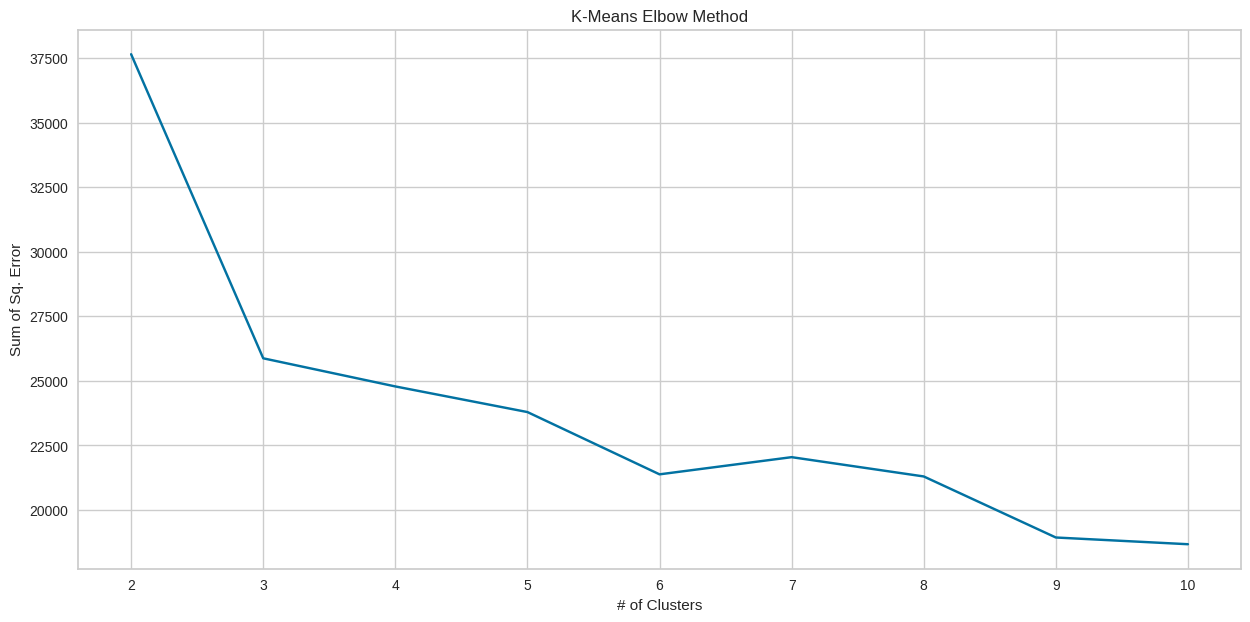

In [39]:
#The value of k, or the number of clusters in the dataset, is unknown so we need to iterate through all of the possible values in order to provide
#the proper labels to our model.
#The range of clusters to be checked will not exceed 10. There would be issues with the dataset if the number of clusters ends up being that high.
err = {}
for k in range(2,11):
  km=KMeans(n_clusters=k, max_iter=1000).fit(scdata)
  err[k]=km.inertia_

plt.figure(figsize=(15,7))
plt.plot(list(err.keys()), list(err.values()))
plt.xlabel('# of Clusters')
plt.ylabel('Sum of Sq. Error')
plt.title('K-Means Elbow Method')




**Observations:**
1. The goal of K-Means clustering is to visualize and choose the lowest value for K where error remains high since the first principal component represents the vector of highest variance.
2. Based on the graph above, the k value with largest error (or variance)would be k=2.
3. However, the magnitude of variance decreases (i.e. the slope of the line decreases) after k=3. therefore, the optimal number of clusters for this data set is 3 based on kmeans.
4. Note that at k=5 the graph does plateau to suggest that maybe 5 clusters could produce insight (depending on time and computing power).


#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

Text(0, 0.5, 'Silhouette Score')

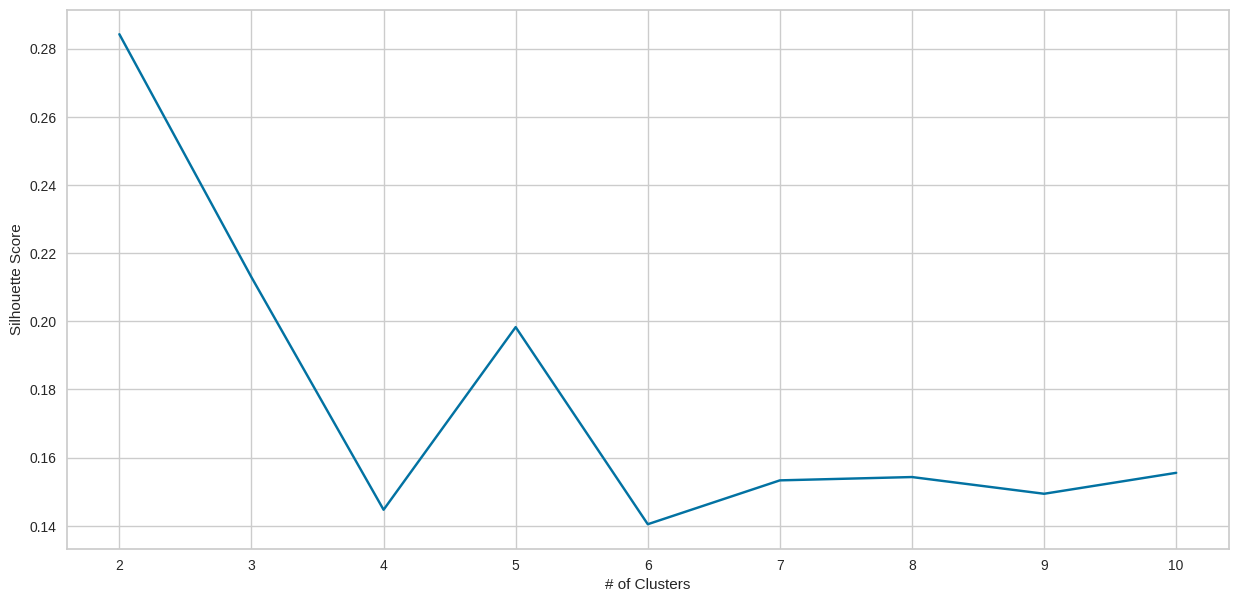

In [40]:
# Silhoutte Score allows us to verify our findings from the K-Means Clustering that we just did.
# The score provides a numerical value for how accurate each K value is in our range.
# This means that the higher the silhouette score, the more optimal.

sscore = {}
for k in range(2,11):
  km=KMeans(n_clusters=k, max_iter=1000).fit(scdata)
  label=km.predict(scdata)
  sscore[k]=silhouette_score(scdata, labels=label)

plt.figure(figsize=(15,7))
plt.plot(list(sscore.keys()), list(sscore.values()))
plt.xlabel('# of Clusters')
plt.ylabel('Silhouette Score')


##### **Observations:**
1. Like K-Means, k=2 has the highest silhouette score. However, we would like to suggest more than two clusters and two clusters does not give insight on the customer base.
2. The second highest silhouette score belongs to k=3 which would suggest that the elbow method was correct for the optimal number of clusters.
3. At k=5, the silhouette score is high but not as high as k=3 so we will ignore it.


#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [41]:
#Special function from Google Colab that measures cell run time#
%%time
km=KMeans(n_clusters=3, max_iter=1000).fit(scdata)
km

CPU times: user 5.68 ms, sys: 3.93 ms, total: 9.61 ms
Wall time: 8.53 ms


KMeans(max_iter=1000, n_clusters=3)

##### **Observations:**
1.  It took 8.53 milliseconds for the model to fit the data.

In [150]:
#Inputing KMeans labels into a variable to use later on when we are comparing algorithms'

df1 = scdata.copy()
df1['KMSegments']=km.labels_
df['KMSegments']=km.labels_

## **Hierarchical Clustering**

#### **Question 10**: Calculate the cophnetic correlation for every combination of distance metrics and linkage. Which combination has the highest cophnetic correlation?

In [43]:
hcdata = scdata.copy()
dmetrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]
linkmethods = ["single", "complete", "average", "weighted"]
ccorr =[]
for x in dmetrics:
  for y in linkmethods:

    Z = linkage(hcdata, method= y , metric= x) #calculating all the distances between clusters
    c, coph_dists = cophenet(Z, pdist(hcdata)) #calculating the distributions of all distance methods
    combos = {'Distance': x, 'Linkage': y, 'Cophnetic Correlation':c}
    ccorr.append(combos) #appending distribution values to the correlation list

cophdf = pd.DataFrame(ccorr) #all correlation values added to dataframe for ease of viewing
print(cophdf, cophdf.max())  #display correlation values with max at the bottom.

       Distance   Linkage  Cophnetic Correlation
0     euclidean    single               0.749304
1     euclidean  complete               0.747637
2     euclidean   average               0.864171
3     euclidean  weighted               0.563970
4     chebyshev    single               0.651512
5     chebyshev  complete               0.682237
6     chebyshev   average               0.764743
7     chebyshev  weighted               0.726200
8   mahalanobis    single               0.777439
9   mahalanobis  complete               0.651907
10  mahalanobis   average               0.822108
11  mahalanobis  weighted               0.755228
12    cityblock    single               0.801558
13    cityblock  complete               0.486010
14    cityblock   average               0.789876
15    cityblock  weighted               0.694280 Distance                 mahalanobis
Linkage                     weighted
Cophnetic Correlation       0.864171
dtype: object


##### **Observations:**
1. The combination with the highest Cophnetic Correlation value is the Euclidean Average combination.

#### **Question 11**: plot the dendogram for every linkage method with "Euclidean" distance only. What should be the appropriate linkage according to the plot?

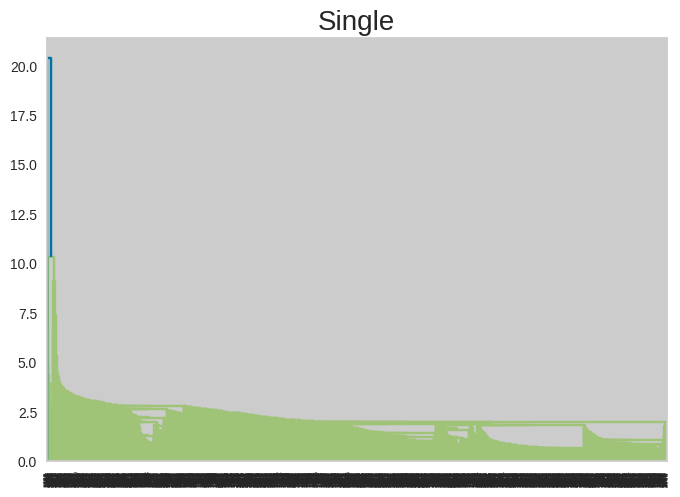

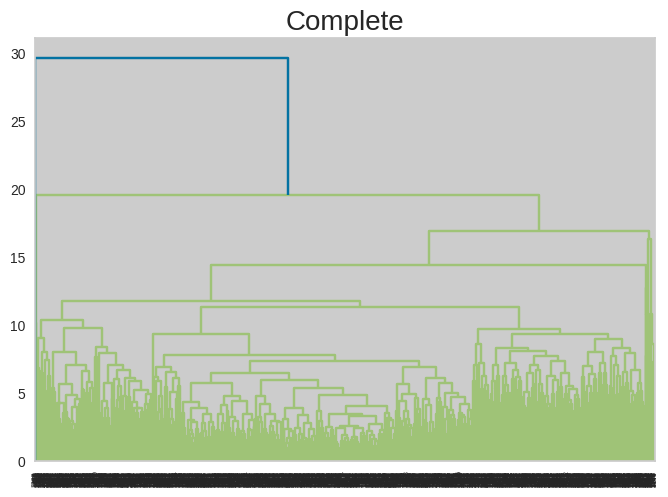

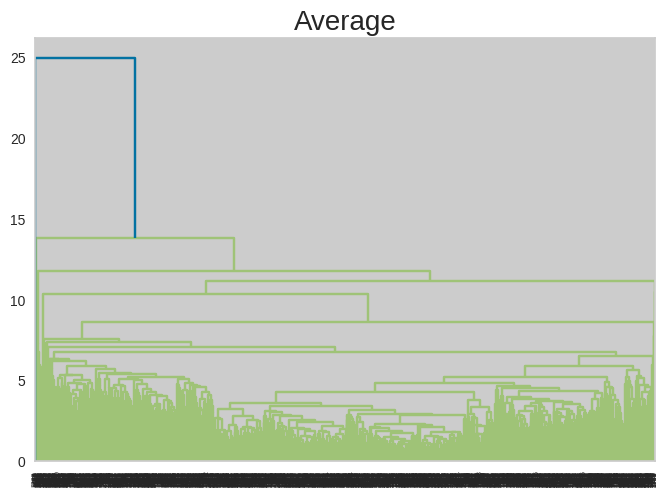

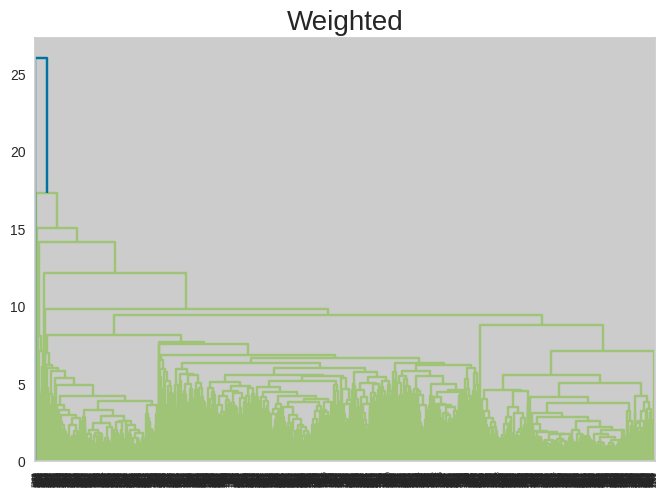

In [44]:
for y in linkmethods:
    Z = linkage(hcdata, method= y , metric= 'euclidean') #link to euclidean only for all methods
    dendrogram(Z, p=4)
    plt.title(y.capitalize(), fontsize = 20)
    plt.show()


##### **Observations:**

1. Each cluster is represented by a U shape with dissimilarity value as the height of the joined clusters.
2. The single method is not readable and will be ignored.
3. The blue line signifies k=2 which shows to have the highest magnitude but are ignoring 2 clusters.
3. The magnitude of dissimilarity for k=3 or the second U shape are very similar so we will continue with Euclidean average method.


#### **Question 12:** Check the silhoutte score for the hierchial clustering. What should be the appropriate number of clusters according to this plot?

Text(0, 0.5, 'Silhouette Score')

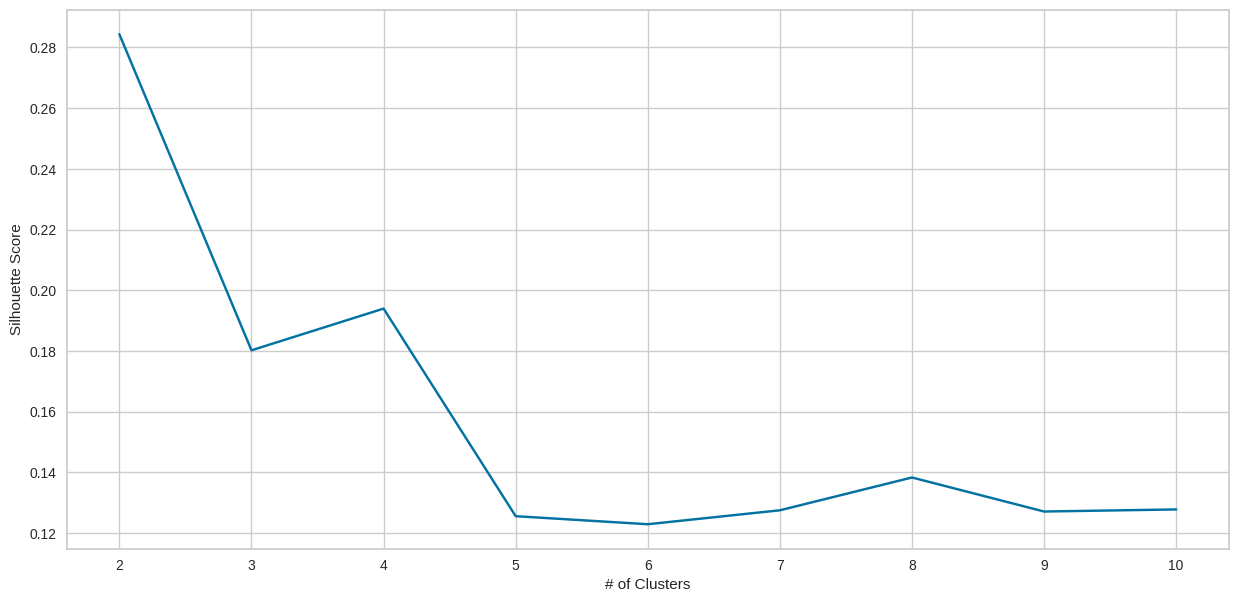

In [45]:
hcsscore = {} #storing values to plot on silhouette score graph for Hierarchal score
for k in range(2,11):
  ac = AgglomerativeClustering(n_clusters=k)
  label=ac.fit_predict(hcdata)
  hcsscore[k]=silhouette_score(scdata, labels=label)

plt.figure(figsize=(15,7))
plt.plot(list(hcsscore.keys()), list(hcsscore.values()))
plt.xlabel('# of Clusters')
plt.ylabel('Silhouette Score')

##### **Observations:**

1. Based on the graph above of the silhouette score of the heirarchal clustering model, the number of clusters should be k=4
2. However, since k=3 is the second highest silhouette score and with domain knowledge it may be difficult to section out the customer base into 4 groups based on the size of the dataset, therefore we will move forward with k=3.

#### **Question 13**: Fit the Hierarchial clustering model with the appropriate parameters finalized above. How much time does it take to fit the model?

In [46]:
#same as before - runtime function that displays execution time of data cell
%%time
ac=AgglomerativeClustering(n_clusters=3, linkage= 'average', metric = 'euclidean').fit(hcdata)
ac

CPU times: user 88.2 ms, sys: 1.03 ms, total: 89.3 ms
Wall time: 90.3 ms


AgglomerativeClustering(linkage='average', n_clusters=3)

##### **Observations:**

1. The time to run the hierarchal clustering model for 3 clusters with the desired metric and linkage took 90.3 ms which is over 10 times longer executiong time than K-Means Clustering with the same number of clusters.

In [74]:
#Same as before; storing clustering segments from Hierarchal Clustering to use later on when we compare the two clustering algorithms.
df2 = hcdata.copy()
df2['HCSegments']=ac.labels_

## **Cluster Profiling and Comparison**

### K-Means Clustering vs Hierarchical Clustering Comparison

#### **Question 14**: Perform and compare Cluster profiling on both algorithms using boxplots. Based on the all the observaions Which one of them provides better clustering?

In [76]:
df1.KMSegments.value_counts() #How many customers are in each segment for KMeans

,count
KMSegments,
0,1006
1,622
2,588


In [77]:
df2.HCSegments.value_counts() #How many customers are in each segment for Hierarchal

,count
HCSegments,
0,2211
2,4
1,1


##### **Observations:**
1. Based on the value counts of each algorithms separation of data into segments, KMeans did a better job at separating the dataset at k=3.

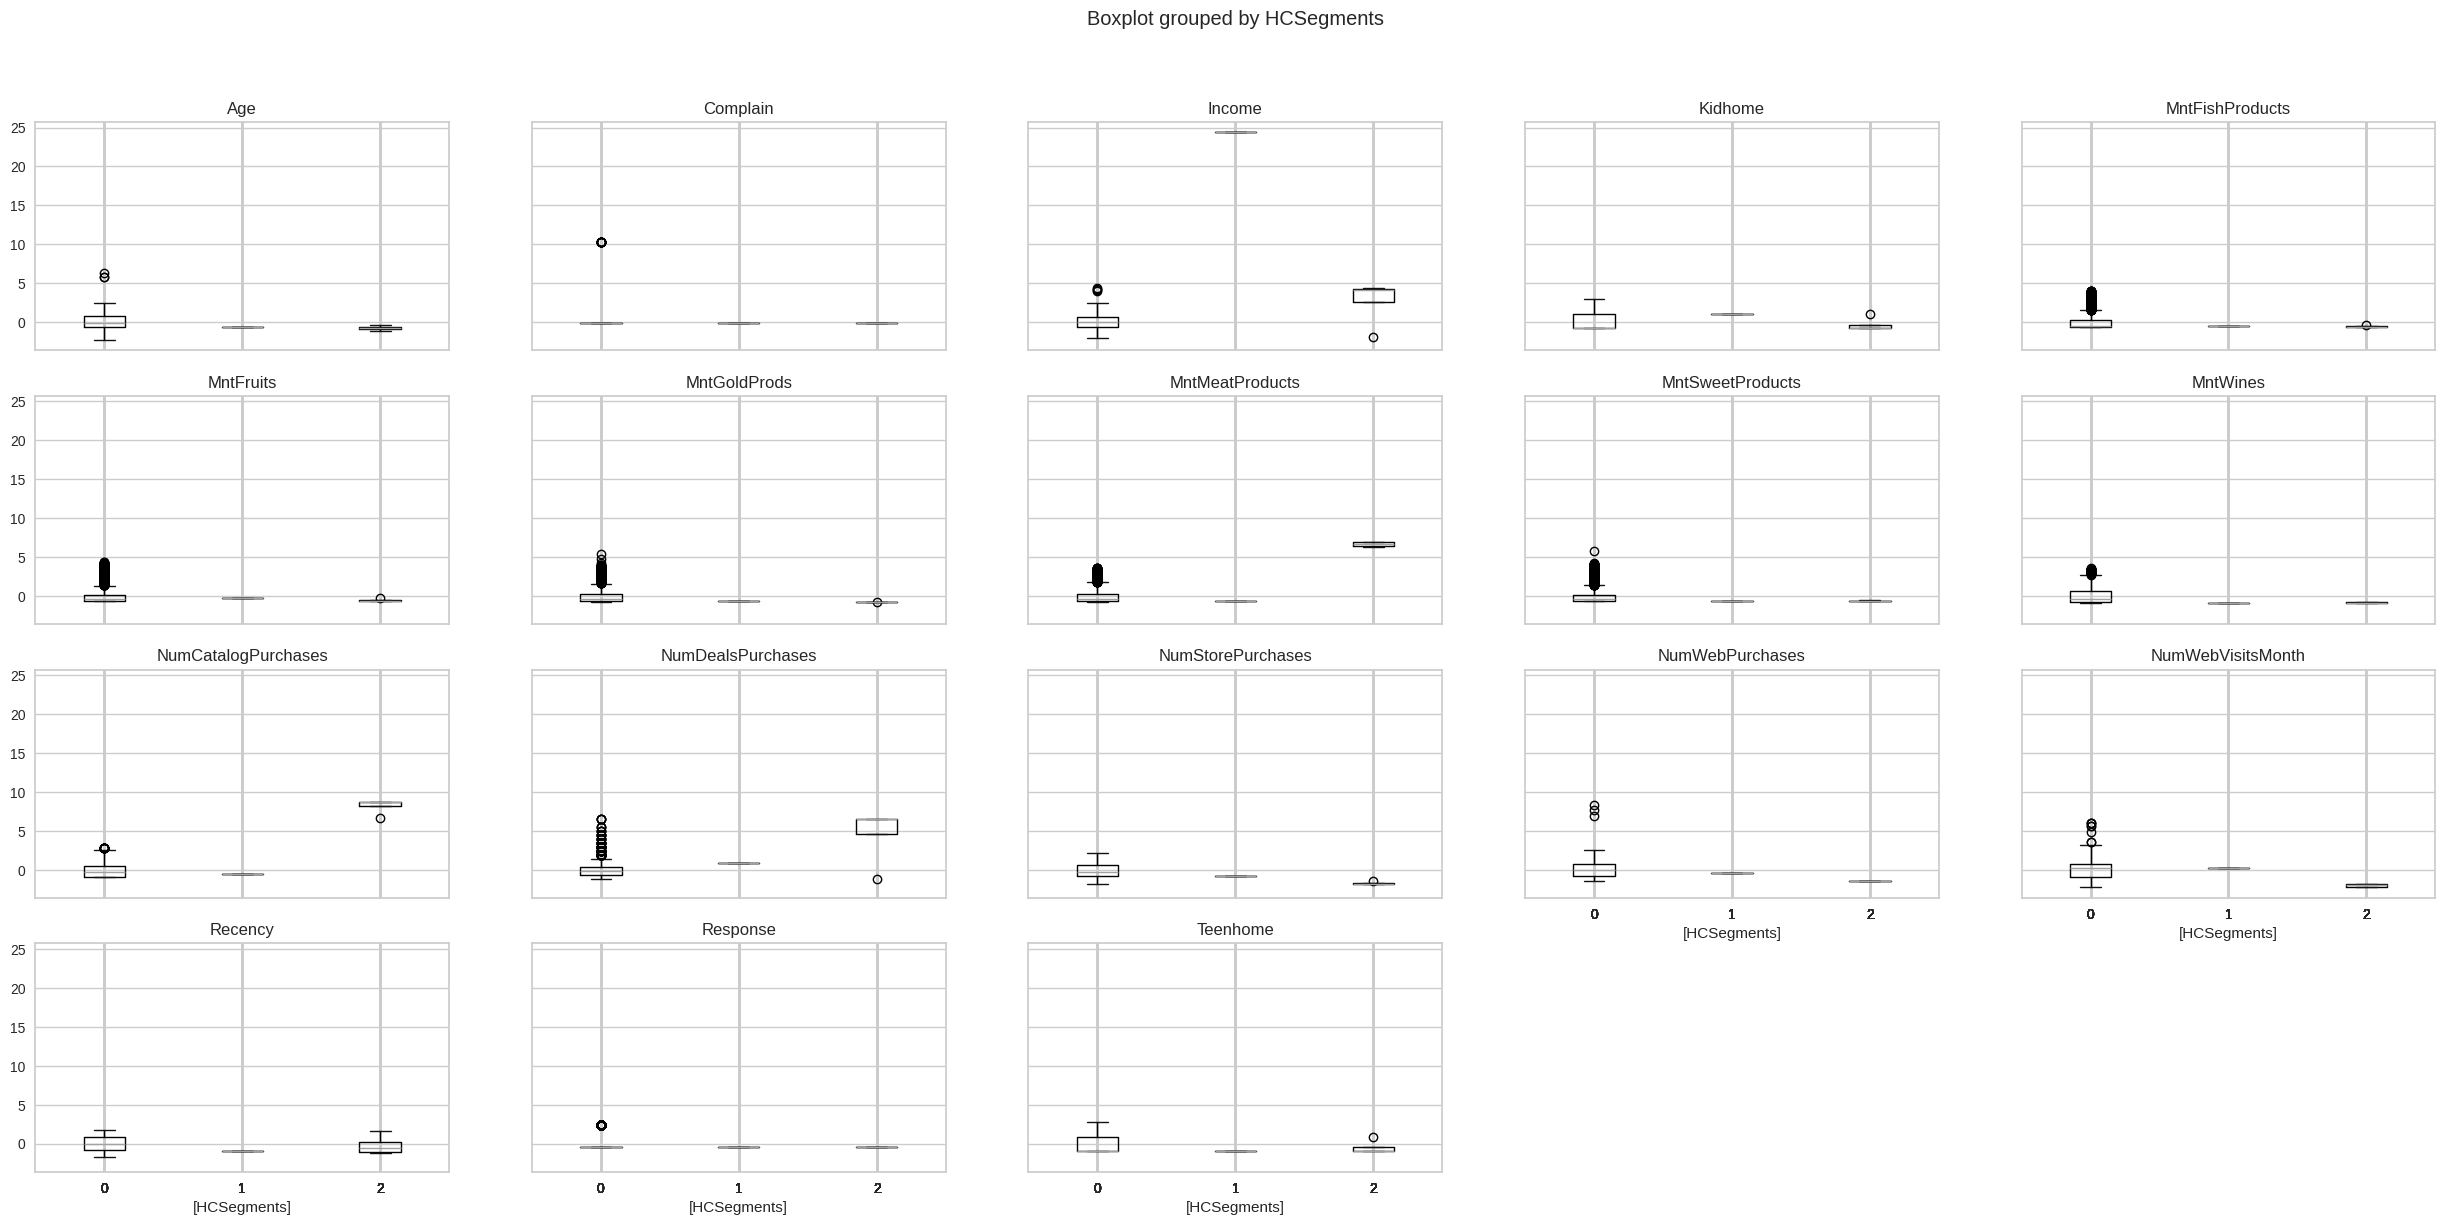

In [78]:
#Boxplots visualizing each Hierarchal segment per variable (column).
df2.boxplot(by = 'HCSegments', layout = (4,5),figsize=(30,14))
plt.show()

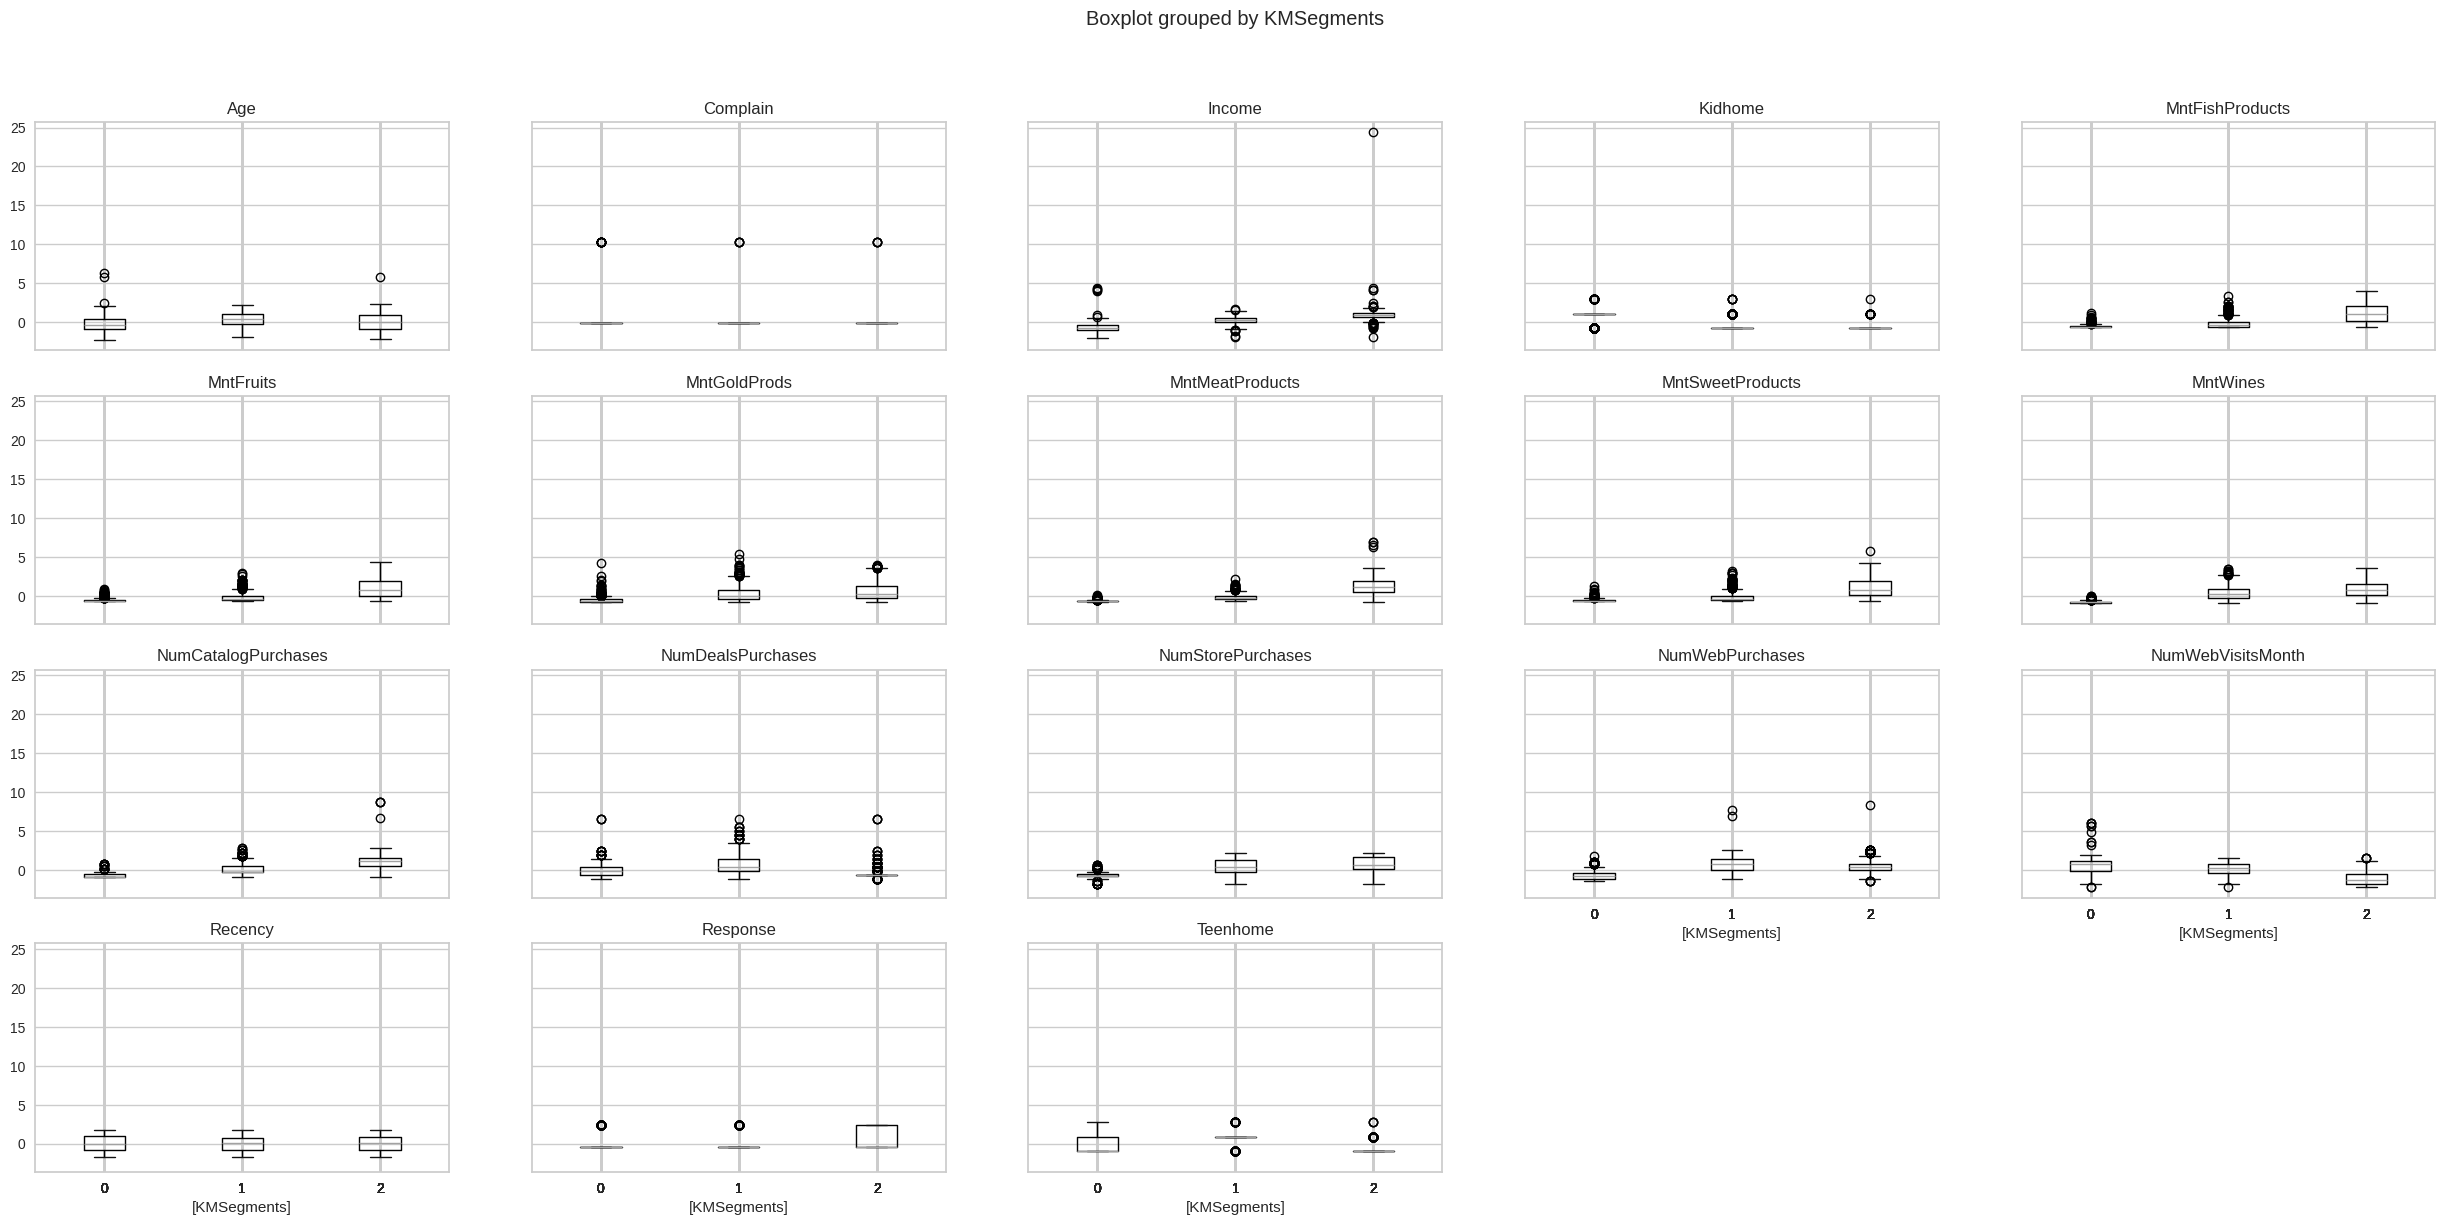

In [79]:
#Boxplots visualizing each KMeans segment per variable (column).
df1.boxplot(by = 'KMSegments', layout = (4,5),figsize=(30,14))
plt.show()

#### **Question 15**: Perform Cluster profiling on the data with the appropriate algorithm determined above using a barplot. What observations can be derived for each cluster from this plot?

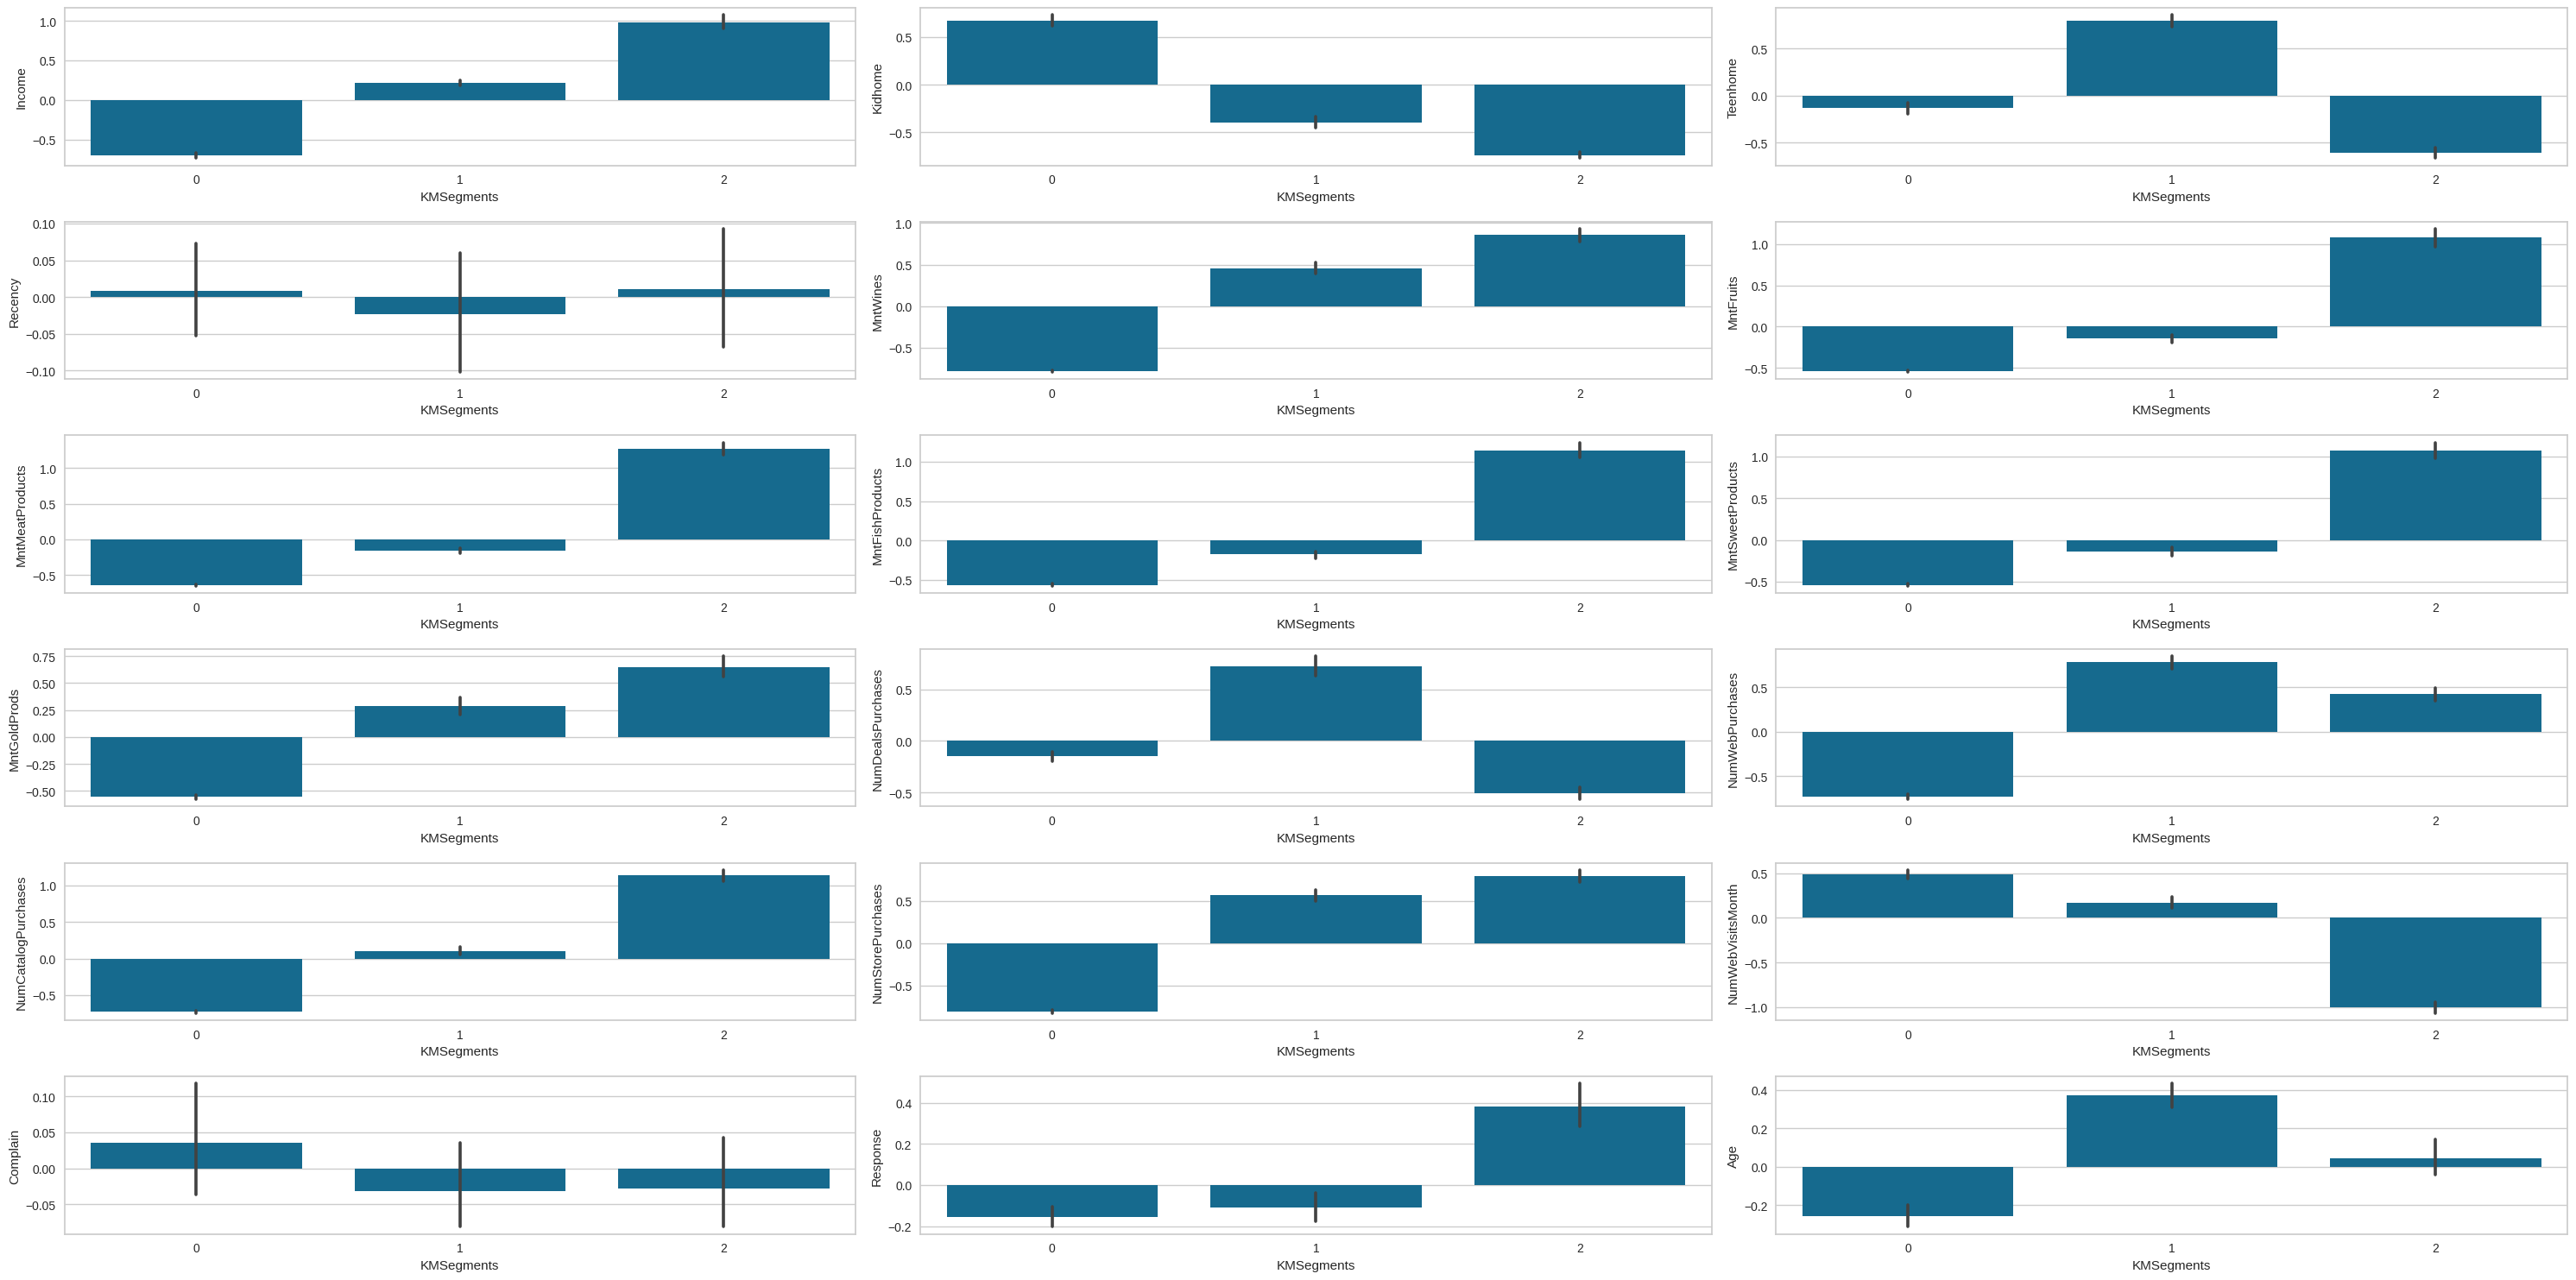

In [167]:
# KMeans barplot showing distributions of each varibale per cluster
plt.figure(figsize=(30, 15))  # Set the figure size for the plot
for i, variable in enumerate(df1.columns.to_list()[:-1]):
    plt.subplot(6, 3, i + 1)
    sns.barplot(data=df1, x=df1.KMSegments, y=variable)

#tighten the layout so it looks cleaner
plt.tight_layout()

##### **Observations:**

Based on the the analysis above it is clear that KMeans provides a much more clear and consise clustering model. From this model we can shed light on the 3 different clusters with information about the customers personalities, demographics and purchasing behaviours.

**CLUSTER 1 (0)**- Low Purchasing Power - Generally the younger generation/younger families who are more likely to have a kid home v. the other clusters. Number of purchases and amounts are all very low however they do take advantage of the deals at times. These customers visit the website the most but have the least amount of web purchases of the last 2 years. How do we get this cluster to spend more money either at the store or on the web since they return to the store/site more frequent than the other clusters.


**CLUSTER 2 (1)**- Medium Purchasing Power - Generally the teenhome families with a steady income. The median age of this cluster is much higher than cluster 1. This group seems to actually buy things when they visit the store/site. This group does not buy Fish and Meat as much as I would expect. However, this group does take advantage of deals offered.


**CLUSTER 3 (2)**- High Purchasing Power - Generally the older households, less likely have a kid/teenhome, may be reluctant to trust new technology. Number of catalog purchases skyrockets in this group. Number of web visits are higher than expected but they never buy anything when they visit. Must keep these customers at same rate of recency by somehow discounting premium products or expanding offerings.

## **BRIAN MANDOZZI'S BUSINESS RECOMMENDATIONS**

Below are my recommendations to improve customer experience, loyalty and revenue for each cluster as well as overall business recommendations.

Cluster 1 Recommendations


*   Rebranding of everyday items to generate a sense of quality to increase spending on essentials at the store.
*   Educate on the different types of wine/meat to understand the costs associated.
*   Offer in-store meal / dinner recommendations to promote cooking from home.


Cluster 2 Recommendations


*   Promote more cost friendly options in the Meat and Wine department to increase spending in those categories. Also offer weekly discounts on select wines/cuts of meat.
*   Promote the most popular discount in the store using purchasing behaviour from this cluster.

Cluster 3 Recommendations

*   Promote a bundle program for different cuts of meat. This cluster spends by far the most on meat which is why there is such a high correlation to meat purchases. Provide smaller cuts at a flat rate as part of a package deal with input from purchasing trends of Cluster 3.
*   Create a list of most popular products based on amounts purchased in this cluster. This has the potential to promote engage the other clusters in specific categories.
*   Promote the use of the online newsletter/website over the catalog. Provide training videos for customers to watch on how to use the website properly and effectively.



Overall Recommendations


*   Creating a loyalty program that offer first time buyers a discount on their first total order as well as future discounts based on previous purchases will help bring new customers into the store as well bring returning customers back more frequently. Even at 5% off customers will want to take advantage.
*   Ease of access for online use/training to help customers use the online platform. Allow customers to view their loyalty account from the website.
*   In order to promote the business effectively, an online/email newsletter with promotions/deals/new products and eventually get away with the catalog. Maybe even creating an app as well for customers to use and shop on in store or on the go.






